# UECFoodPixComplete EDA

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

In [20]:
dataset_path = os.path.join(os.getcwd(), 'UECFOODPIXCOMPLETE/data')

category_file = os.path.join(dataset_path, 'category.txt')
categories = pd.read_csv(category_file, sep='\t').reset_index(drop=True)

## Class labels

In [5]:
print("Class Labels:")
print(categories)

Class Labels:
      id                     name
0      1                     rice
1      2             eels on rice
2      3                    pilaf
3      4  chicken-'n'-egg on rice
4      5      pork cutlet on rice
..   ...                      ...
97    98             french fries
98    99               mixed rice
99   100            goya chanpuru
100  101                   others
101  102                 beverage

[102 rows x 2 columns]


In [6]:
backgorund_row = pd.DataFrame({'id': [0], 'name': ['background']})
categories = pd.concat([backgorund_row, categories]).reset_index(drop=True)

categories.head()

,id,name
0,0,background
1,1,rice
2,2,eels on rice
3,3,pilaf
4,4,chicken-'n'-egg on rice


Load image names

In [7]:
train_file = os.path.join(dataset_path, 'train9000.txt')
test_file = os.path.join(dataset_path, 'test1000.txt')

train_images = pd.read_csv(train_file, header=None, names=['image_id'])
test_images = pd.read_csv(test_file, header=None, names=['image_id'])

test_images.head()

,image_id
0,1227
1,1257
2,1287
3,1305
4,1335


## Train and test image counts

In [8]:
print(f"Number of training images: {len(train_images)}")
print(f"Number of testing images: {len(test_images)}")

Number of training images: 9000
Number of testing images: 1000


In [9]:
def visualize_sample_images(image_ids, dataset_type='train', num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i, image_id in enumerate(image_ids[:num_samples]):
        img_path = os.path.join(dataset_path+'/UECFoodPIXCOMPLETE', dataset_type, 'img', f"{image_id}.jpg")
        mask_path = os.path.join(dataset_path+'/UECFoodPIXCOMPLETE', dataset_type, 'mask', f"{image_id}.png")
        
        image = Image.open(img_path)
        mask = Image.open(mask_path)
        
        axes[i].imshow(image)
        axes[i].imshow(mask, alpha=0.5)  # Overlay mask with some transparency
        axes[i].axis('off')
        axes[i].set_title(f"Image ID: {image_id}")
    plt.show()

 ## Sample training images

Sample Training Images:


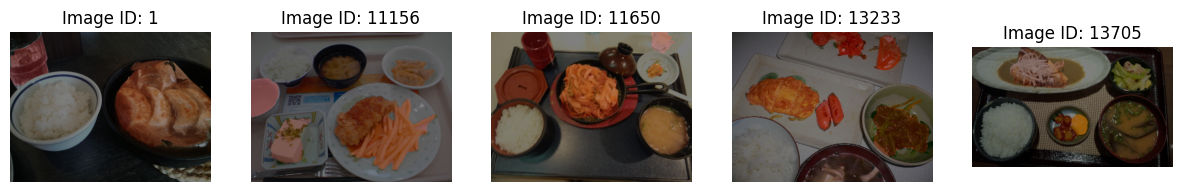

In [10]:
print("Sample Training Images:")
visualize_sample_images(train_images['image_id'], dataset_type='train')

 ## Sample testing images

Sample Testing Images:


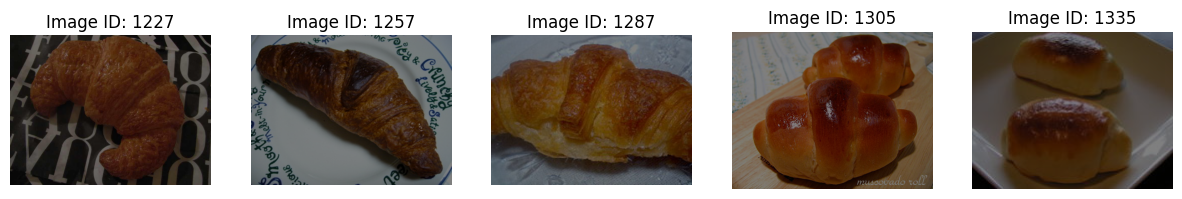

In [11]:
print("Sample Testing Images:")
visualize_sample_images(test_images['image_id'], dataset_type='test')

## Decoding masks

In [12]:
color_to_category = { (i, 0, 0): i for i in range(103) }  # RGB (i, 0, 0) maps to category i

def get_categories_from_mask(mask_image, color_to_category):
    mask_array = np.array(mask_image)
    
    unique_colors = np.unique(mask_array.reshape(-1, mask_array.shape[2]), axis=0)
    unique_colors = unique_colors[:, :3]  # Remove the 4th element (alpha channel)
    
    categories = [color_to_category[tuple(color)] for color in unique_colors if tuple(color) in color_to_category]
    
    return categories

In [13]:
mask_path = '/home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/train/mask/1.png'
mask_image = Image.open(mask_path)

get_categories_from_mask(mask_image, color_to_category)

[0, 1, 42, 102]

 ## Distribution of Classes in Train and Test Sets

In [14]:
def analyze_class_distribution(image_ids, categories, dataset_type='train'):
    class_counts = {category: 0 for category in categories['name']}
    for image_id in tqdm(image_ids, desc="Processing images"):
        print("image_id:", image_id)
        mask_path = os.path.join(dataset_path, 'UECFoodPIXCOMPLETE', dataset_type, 'mask', f"{image_id}.png")
        print("mask_path 1:", mask_path)
        if os.path.exists(mask_path):
            print("mask path:", mask_path)
            mask_image = Image.open(mask_path).convert('RGBA')
            image_categories = get_categories_from_mask(mask_image, color_to_category)
            for category_id in image_categories:
                class_name = categories.loc[categories['id'] == category_id, 'name'].values[0]
                class_counts[class_name] += 1
    return class_counts

In [15]:
# train_class_distribution = analyze_class_distribution(train_images['image_id'], categories)
test_class_distribution = analyze_class_distribution(test_images['image_id'], categories, dataset_type='test')

test_class_distribution

Processing images:   0%|                                                                                                                                                           | 0/1000 [00:00<?, ?it/s]

image_id: 1227
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1227.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1227.png


Processing images:   0%|▍                                                                                                                                                  | 3/1000 [00:00<02:58,  5.60it/s]

image_id: 1257
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1257.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1257.png
image_id: 1287
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1287.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1287.png
image_id: 1305
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1305.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1305.png


Processing images:   1%|█                                                                                                                                                  | 7/1000 [00:00<01:45,  9.37it/s]

image_id: 1335
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1335.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1335.png
image_id: 1365
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1365.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1365.png
image_id: 1393
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1393.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1393.png
image_id: 1419
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1419.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1419.png


Processing images:   1%|█▎                                                                                                                                                 | 9/1000 [00:01<02:03,  8.01it/s]

image_id: 1449
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1449.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1449.png
image_id: 1479
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1479.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1479.png


Processing images:   1%|█▌                                                                                                                                                | 11/1000 [00:01<02:10,  7.59it/s]

image_id: 11085
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11085.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11085.png
image_id: 14325
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14325.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14325.png


Processing images:   1%|█▉                                                                                                                                                | 13/1000 [00:02<03:04,  5.35it/s]

image_id: 1526
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1526.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1526.png
image_id: 1555
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1555.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1555.png


Processing images:   1%|██                                                                                                                                                | 14/1000 [00:02<02:44,  6.01it/s]

image_id: 1585
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1585.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1585.png
image_id: 11090
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11090.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11090.png


Processing images:   2%|██▎                                                                                                                                               | 16/1000 [00:02<02:25,  6.76it/s]

image_id: 14771
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14771.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14771.png


Processing images:   2%|██▍                                                                                                                                               | 17/1000 [00:02<03:07,  5.25it/s]

image_id: 15482
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15482.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15482.png


Processing images:   2%|██▋                                                                                                                                               | 18/1000 [00:03<03:28,  4.71it/s]

image_id: 1596
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1596.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1596.png


Processing images:   2%|███▏                                                                                                                                              | 22/1000 [00:03<02:19,  7.03it/s]

image_id: 1616
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1616.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1616.png
image_id: 1646
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1646.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1646.png
image_id: 1672
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1672.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1672.png
image_id: 9160
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9160.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9160.png


Processing images:   2%|███▎                                                                                                                                              | 23/1000 [00:03<02:24,  6.76it/s]

image_id: 15674
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15674.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15674.png


Processing images:   3%|███▊                                                                                                                                              | 26/1000 [00:04<02:14,  7.26it/s]

image_id: 1710
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1710.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1710.png
image_id: 1740
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1740.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1740.png
image_id: 1770
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1770.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1770.png
image_id: 13710
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13710.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13710.png


Processing images:   3%|████                                                                                                                                              | 28/1000 [00:04<02:31,  6.43it/s]

image_id: 14484
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14484.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14484.png


Processing images:   3%|████▏                                                                                                                                             | 29/1000 [00:05<03:42,  4.36it/s]

image_id: 1805
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1805.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1805.png
image_id: 1835
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1835.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1835.png


Processing images:   3%|████▋                                                                                                                                             | 32/1000 [00:05<03:07,  5.15it/s]

image_id: 1865
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1865.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1865.png
image_id: 11199
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11199.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11199.png


Processing images:   3%|████▊                                                                                                                                             | 33/1000 [00:05<03:04,  5.24it/s]

image_id: 15967
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15967.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15967.png


Processing images:   3%|████▉                                                                                                                                             | 34/1000 [00:06<03:20,  4.81it/s]

image_id: 1918
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1918.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1918.png


Processing images:   4%|█████▎                                                                                                                                            | 36/1000 [00:06<03:38,  4.41it/s]

image_id: 1948
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1948.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1948.png
image_id: 1978
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1978.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1978.png


Processing images:   4%|█████▍                                                                                                                                            | 37/1000 [00:06<04:04,  3.94it/s]

image_id: 2001
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2001.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2001.png


Processing images:   4%|█████▌                                                                                                                                            | 38/1000 [00:07<04:24,  3.63it/s]

image_id: 2031
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2031.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2031.png


Processing images:   4%|█████▊                                                                                                                                            | 40/1000 [00:07<03:59,  4.00it/s]

image_id: 2061
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2061.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2061.png
image_id: 2091
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2091.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2091.png


Processing images:   4%|█████▉                                                                                                                                            | 41/1000 [00:07<03:46,  4.23it/s]

image_id: 14786
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14786.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14786.png


Processing images:   4%|██████▍                                                                                                                                           | 44/1000 [00:08<02:55,  5.46it/s]

image_id: 2110
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2110.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2110.png
image_id: 2140
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2140.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2140.png
image_id: 2170
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2170.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2170.png
image_id: 9156
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9156.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9156.png


Processing images:   5%|██████▊                                                                                                                                           | 47/1000 [00:08<02:30,  6.34it/s]

image_id: 10867
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10867.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10867.png
image_id: 11314
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11314.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11314.png


Processing images:   5%|███████▏                                                                                                                                          | 49/1000 [00:09<02:33,  6.20it/s]

image_id: 11653
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11653.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11653.png
image_id: 14337
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14337.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14337.png


Processing images:   5%|███████▎                                                                                                                                          | 50/1000 [00:09<04:10,  3.79it/s]

image_id: 14905
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14905.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14905.png


Processing images:   5%|███████▍                                                                                                                                          | 51/1000 [00:09<04:30,  3.51it/s]

image_id: 15553
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15553.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15553.png


Processing images:   5%|███████▌                                                                                                                                          | 52/1000 [00:10<04:48,  3.29it/s]

image_id: 16269
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16269.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16269.png


Processing images:   5%|███████▋                                                                                                                                          | 53/1000 [00:10<04:39,  3.38it/s]

image_id: 2213
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2213.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2213.png


Processing images:   5%|███████▉                                                                                                                                          | 54/1000 [00:11<05:52,  2.69it/s]

image_id: 2243
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2243.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2243.png


Processing images:   6%|████████▏                                                                                                                                         | 56/1000 [00:11<04:33,  3.46it/s]

image_id: 2273
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2273.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2273.png
image_id: 9148
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9148.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9148.png


Processing images:   6%|████████▍                                                                                                                                         | 58/1000 [00:11<03:37,  4.33it/s]

image_id: 11048
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11048.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11048.png
image_id: 2305
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2305.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2305.png


Processing images:   6%|████████▌                                                                                                                                         | 59/1000 [00:12<04:00,  3.91it/s]

image_id: 2335
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2335.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2335.png


Processing images:   6%|████████▊                                                                                                                                         | 60/1000 [00:12<04:07,  3.80it/s]

image_id: 2365
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2365.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2365.png


Processing images:   6%|█████████                                                                                                                                         | 62/1000 [00:13<04:55,  3.17it/s]

image_id: 9286
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9286.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9286.png
image_id: 2409
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2409.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2409.png


Processing images:   6%|█████████▎                                                                                                                                        | 64/1000 [00:13<03:17,  4.73it/s]

image_id: 2439
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2439.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2439.png
image_id: 2470
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2470.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2470.png
image_id: 13343
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13343.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13343.png


Processing images:   7%|█████████▋                                                                                                                                        | 66/1000 [00:13<02:23,  6.53it/s]

image_id: 2506
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2506.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2506.png
image_id: 2536
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2536.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2536.png
image_id: 2566
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2566.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2566.png


Processing images:   7%|██████████▏                                                                                                                                       | 70/1000 [00:14<02:19,  6.66it/s]

image_id: 9243
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9243.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9243.png
image_id: 14695
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14695.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14695.png


Processing images:   7%|██████████▎                                                                                                                                       | 71/1000 [00:14<03:04,  5.04it/s]

image_id: 2604
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2604.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2604.png


Processing images:   7%|██████████▌                                                                                                                                       | 72/1000 [00:14<03:23,  4.55it/s]

image_id: 2636
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2636.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2636.png


Processing images:   7%|██████████▊                                                                                                                                       | 74/1000 [00:15<03:00,  5.13it/s]

image_id: 2667
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2667.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2667.png
image_id: 10793
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10793.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10793.png


Processing images:   8%|███████████                                                                                                                                       | 76/1000 [00:15<02:36,  5.90it/s]

image_id: 2697
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2697.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2697.png
image_id: 2727
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2727.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2727.png
image_id: 2757
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2757.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2757.png
image_id: 2787
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2787.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2787.png


Processing images:   8%|███████████▌                                                                                                                                      | 79/1000 [00:15<01:30, 10.17it/s]

image_id: 15877
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15877.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15877.png


Processing images:   8%|███████████▊                                                                                                                                      | 81/1000 [00:16<01:53,  8.10it/s]

image_id: 2819
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2819.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2819.png
image_id: 2849
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2849.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2849.png
image_id: 2879
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2879.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2879.png
image_id: 11424
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11424.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11424.png


Processing images:   8%|████████████▎                                                                                                                                     | 84/1000 [00:16<01:36,  9.49it/s]

image_id: 2916
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2916.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2916.png
image_id: 2946
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2946.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2946.png
image_id: 2976
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2976.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2976.png


Processing images:   9%|████████████▉                                                                                                                                     | 89/1000 [00:16<01:31,  9.93it/s]

image_id: 3000
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3000.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3000.png
image_id: 3030
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3030.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3030.png
image_id: 3060
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3060.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3060.png
image_id: 3090
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3090.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3090.png


Processing images:   9%|█████████████▌                                                                                                                                    | 93/1000 [00:17<01:39,  9.11it/s]

image_id: 3107
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3107.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3107.png
image_id: 3137
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3137.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3137.png
image_id: 3167
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3167.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3167.png


Processing images:  10%|█████████████▊                                                                                                                                    | 95/1000 [00:17<01:51,  8.14it/s]

image_id: 3195
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3195.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3195.png
image_id: 3225
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3225.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3225.png
image_id: 3255
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3255.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3255.png


Processing images:  10%|██████████████▏                                                                                                                                   | 97/1000 [00:18<02:44,  5.49it/s]

image_id: 3285
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3285.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3285.png


Processing images:  10%|██████████████▎                                                                                                                                   | 98/1000 [00:18<03:49,  3.92it/s]

image_id: 3315
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3315.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3315.png


Processing images:  10%|██████████████▍                                                                                                                                   | 99/1000 [00:19<04:04,  3.68it/s]

image_id: 3345
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3345.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3345.png
image_id: 3375
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3375.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3375.png


Processing images:  10%|██████████████▋                                                                                                                                  | 101/1000 [00:19<03:31,  4.25it/s]

image_id: 3400
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3400.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3400.png


Processing images:  10%|██████████████▉                                                                                                                                  | 103/1000 [00:20<03:30,  4.26it/s]

image_id: 3430
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3430.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3430.png
image_id: 3460
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3460.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3460.png


Processing images:  10%|███████████████▏                                                                                                                                 | 105/1000 [00:20<03:18,  4.50it/s]

image_id: 3491
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3491.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3491.png
image_id: 10992
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10992.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10992.png


Processing images:  11%|███████████████▌                                                                                                                                 | 107/1000 [00:20<03:02,  4.88it/s]

image_id: 12436
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12436.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12436.png
image_id: 14295
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14295.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14295.png


Processing images:  11%|███████████████▋                                                                                                                                 | 108/1000 [00:21<04:02,  3.68it/s]

image_id: 15123
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15123.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15123.png


Processing images:  11%|███████████████▊                                                                                                                                 | 109/1000 [00:21<03:48,  3.90it/s]

image_id: 15447
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15447.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15447.png


Processing images:  11%|███████████████▉                                                                                                                                 | 110/1000 [00:21<04:29,  3.31it/s]

image_id: 15897
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15897.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15897.png


Processing images:  11%|████████████████▍                                                                                                                                | 113/1000 [00:22<02:48,  5.25it/s]

image_id: 3498
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3498.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3498.png
image_id: 3528
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3528.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3528.png
image_id: 3558
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3558.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3558.png


Processing images:  12%|████████████████▋                                                                                                                                | 115/1000 [00:22<02:03,  7.14it/s]

image_id: 3588
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3588.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3588.png
image_id: 9116
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9116.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9116.png


Processing images:  12%|█████████████████▎                                                                                                                               | 119/1000 [00:22<01:36,  9.17it/s]

image_id: 3596
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3596.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3596.png
image_id: 3626
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3626.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3626.png
image_id: 3656
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3656.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3656.png
image_id: 3686
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3686.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3686.png


Processing images:  12%|█████████████████▌                                                                                                                               | 121/1000 [00:23<01:51,  7.88it/s]

image_id: 3708
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3708.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3708.png
image_id: 3738
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3738.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3738.png


Processing images:  12%|█████████████████▋                                                                                                                               | 122/1000 [00:23<02:23,  6.14it/s]

image_id: 3768
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3768.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3768.png


Processing images:  12%|█████████████████▊                                                                                                                               | 123/1000 [00:23<02:54,  5.04it/s]

image_id: 14692
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14692.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14692.png


Processing images:  12%|█████████████████▉                                                                                                                               | 124/1000 [00:24<03:36,  4.05it/s]

image_id: 3819
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3819.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3819.png


Processing images:  13%|██████████████████▎                                                                                                                              | 126/1000 [00:24<03:33,  4.09it/s]

image_id: 3850
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3850.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3850.png
image_id: 3880
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3880.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3880.png


Processing images:  13%|██████████████████▌                                                                                                                              | 128/1000 [00:25<03:04,  4.72it/s]

image_id: 3906
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3906.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3906.png
image_id: 3936
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3936.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3936.png


Processing images:  13%|██████████████████▊                                                                                                                              | 130/1000 [00:25<02:49,  5.14it/s]

image_id: 3966
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3966.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3966.png
image_id: 16739
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16739.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16739.png


Processing images:  13%|██████████████████▉                                                                                                                              | 131/1000 [00:25<02:41,  5.39it/s]

image_id: 4016
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4016.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4016.png


Processing images:  13%|███████████████████▏                                                                                                                             | 132/1000 [00:25<03:15,  4.45it/s]

image_id: 4046
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4046.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4046.png
image_id: 4076
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4076.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4076.png
image_id: 15778
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15778.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15778.png


Processing images:  14%|████████████████████▏                                                                                                                            | 139/1000 [00:26<01:25, 10.02it/s]

image_id: 4120
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4120.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4120.png
image_id: 4150
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4150.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4150.png
image_id: 4180
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4180.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4180.png
image_id: 4198
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4198.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4198.png
image_id: 4228
mask_path 1: /home/user/dev/capstone/eda/food

Processing images:  14%|████████████████████▋                                                                                                                            | 143/1000 [00:26<01:06, 12.87it/s]

image_id: 4290
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4290.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4290.png
image_id: 4324
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4324.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4324.png
image_id: 4356
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4356.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4356.png
image_id: 4386
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4386.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4386.png


Processing images:  14%|█████████████████████                                                                                                                            | 145/1000 [00:27<02:32,  5.62it/s]

image_id: 4412
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4412.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4412.png
image_id: 4442
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4442.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4442.png


Processing images:  15%|█████████████████████▎                                                                                                                           | 147/1000 [00:27<02:18,  6.15it/s]

image_id: 4472
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4472.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4472.png
image_id: 4498
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4498.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4498.png


Processing images:  15%|█████████████████████▉                                                                                                                           | 151/1000 [00:28<02:26,  5.80it/s]

image_id: 4529
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4529.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4529.png
image_id: 4559
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4559.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4559.png
image_id: 4589
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4589.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4589.png


Processing images:  15%|██████████████████████                                                                                                                           | 152/1000 [00:28<02:17,  6.16it/s]

image_id: 4620
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4620.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4620.png
image_id: 4650
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4650.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4650.png


Processing images:  16%|██████████████████████▍                                                                                                                          | 155/1000 [00:29<01:55,  7.32it/s]

image_id: 4680
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4680.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4680.png
image_id: 4696
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4696.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4696.png


Processing images:  16%|██████████████████████▌                                                                                                                          | 156/1000 [00:29<03:08,  4.48it/s]

image_id: 4726
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4726.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4726.png
image_id: 4756
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4756.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4756.png


Processing images:  16%|██████████████████████▉                                                                                                                          | 158/1000 [00:29<03:04,  4.57it/s]

image_id: 4786
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4786.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4786.png


Processing images:  16%|███████████████████████▎                                                                                                                         | 161/1000 [00:30<02:24,  5.83it/s]

image_id: 4808
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4808.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4808.png
image_id: 4838
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4838.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4838.png
image_id: 4868
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4868.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4868.png
image_id: 4898
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4898.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4898.png


Processing images:  16%|███████████████████████▋                                                                                                                         | 163/1000 [00:30<01:50,  7.55it/s]

image_id: 4928
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4928.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4928.png
image_id: 4989
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4989.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4989.png


Processing images:  16%|███████████████████████▉                                                                                                                         | 165/1000 [00:30<01:55,  7.24it/s]

image_id: 5023
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5023.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5023.png
image_id: 5054
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5054.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5054.png


Processing images:  17%|████████████████████████▎                                                                                                                        | 168/1000 [00:31<02:06,  6.58it/s]

image_id: 9239
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9239.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9239.png
image_id: 5107
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5107.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5107.png


Processing images:  17%|████████████████████████▌                                                                                                                        | 169/1000 [00:31<02:43,  5.07it/s]

image_id: 5140
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5140.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5140.png


Processing images:  17%|████████████████████████▊                                                                                                                        | 171/1000 [00:32<02:44,  5.05it/s]

image_id: 5176
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5176.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5176.png
image_id: 5208
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5208.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5208.png


Processing images:  17%|█████████████████████████                                                                                                                        | 173/1000 [00:32<02:42,  5.10it/s]

image_id: 5239
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5239.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5239.png
image_id: 5270
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5270.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5270.png


Processing images:  17%|█████████████████████████▏                                                                                                                       | 174/1000 [00:32<02:41,  5.13it/s]

image_id: 5297
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5297.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5297.png


Processing images:  18%|█████████████████████████▍                                                                                                                       | 175/1000 [00:33<03:19,  4.13it/s]

image_id: 5327
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5327.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5327.png


Processing images:  18%|█████████████████████████▌                                                                                                                       | 176/1000 [00:33<04:35,  2.99it/s]

image_id: 5357
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5357.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5357.png


Processing images:  18%|█████████████████████████▋                                                                                                                       | 177/1000 [00:33<04:33,  3.01it/s]

image_id: 5388
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5388.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5388.png


Processing images:  18%|█████████████████████████▊                                                                                                                       | 178/1000 [00:34<05:05,  2.69it/s]

image_id: 5411
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5411.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5411.png


Processing images:  18%|██████████████████████████                                                                                                                       | 180/1000 [00:34<04:07,  3.31it/s]

image_id: 5441
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5441.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5441.png
image_id: 5471
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5471.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5471.png


Processing images:  18%|██████████████████████████▍                                                                                                                      | 182/1000 [00:35<04:21,  3.13it/s]

image_id: 11554
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11554.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11554.png
image_id: 5513
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5513.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5513.png


Processing images:  18%|██████████████████████████▌                                                                                                                      | 183/1000 [00:35<03:34,  3.81it/s]

image_id: 5544
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5544.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5544.png
image_id: 5574
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5574.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5574.png


Processing images:  19%|███████████████████████████                                                                                                                      | 187/1000 [00:36<02:01,  6.72it/s]

image_id: 5598
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5598.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5598.png
image_id: 5628
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5628.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5628.png
image_id: 5658
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5658.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5658.png


Processing images:  19%|███████████████████████████▌                                                                                                                     | 190/1000 [00:36<02:25,  5.56it/s]

image_id: 5688
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5688.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5688.png
image_id: 5713
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5713.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5713.png
image_id: 5743
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5743.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5743.png


Processing images:  19%|███████████████████████████▊                                                                                                                     | 192/1000 [00:37<02:08,  6.28it/s]

image_id: 5773
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5773.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5773.png
image_id: 5802
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5802.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5802.png


Processing images:  19%|████████████████████████████▏                                                                                                                    | 194/1000 [00:37<01:53,  7.12it/s]

image_id: 5832
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5832.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5832.png
image_id: 5862
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5862.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5862.png
image_id: 16765
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16765.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16765.png


Processing images:  20%|████████████████████████████▊                                                                                                                    | 199/1000 [00:37<01:18, 10.18it/s]

image_id: 5915
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5915.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5915.png
image_id: 5945
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5945.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5945.png
image_id: 5975
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5975.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5975.png
image_id: 5997
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5997.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5997.png
image_id: 6027
mask_path 1: /home/user/dev/capstone/eda/food

Processing images:  20%|█████████████████████████████▎                                                                                                                   | 202/1000 [00:38<01:09, 11.49it/s]

image_id: 6057
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6057.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6057.png
image_id: 6087
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6087.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6087.png
image_id: 6111
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6111.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6111.png
image_id: 6141
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6141.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6141.png
image_id: 6171
mask_path 1: /home/user/dev/capstone/eda/food

Processing images:  21%|█████████████████████████████▊                                                                                                                   | 206/1000 [00:38<01:11, 11.09it/s]

image_id: 6195
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6195.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6195.png
image_id: 6225
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6225.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6225.png


Processing images:  21%|██████████████████████████████▏                                                                                                                  | 208/1000 [00:38<01:44,  7.61it/s]

image_id: 6255
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6255.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6255.png
image_id: 6285
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6285.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6285.png


Processing images:  21%|██████████████████████████████▍                                                                                                                  | 210/1000 [00:39<01:43,  7.66it/s]

image_id: 6309
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6309.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6309.png
image_id: 6339
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6339.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6339.png


Processing images:  21%|███████████████████████████████                                                                                                                  | 214/1000 [00:39<01:26,  9.08it/s]

image_id: 6369
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6369.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6369.png
image_id: 6390
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6390.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6390.png
image_id: 6420
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6420.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6420.png
image_id: 6450
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6450.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6450.png


Processing images:  22%|███████████████████████████████▊                                                                                                                 | 219/1000 [00:39<01:07, 11.52it/s]

image_id: 6481
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6481.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6481.png
image_id: 6502
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6502.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6502.png
image_id: 6532
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6532.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6532.png
image_id: 6562
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6562.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6562.png


Processing images:  22%|████████████████████████████████                                                                                                                 | 221/1000 [00:40<01:14, 10.50it/s]

image_id: 9235
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9235.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9235.png
image_id: 6611
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6611.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6611.png


Processing images:  22%|████████████████████████████████▍                                                                                                                | 224/1000 [00:40<01:02, 12.43it/s]

image_id: 6641
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6641.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6641.png
image_id: 6671
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6671.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6671.png
image_id: 6691
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6691.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6691.png
image_id: 6721
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6721.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6721.png
image_id: 6751
mask_path 1: /home/user/dev/capstone/eda/food

Processing images:  23%|████████████████████████████████▉                                                                                                                | 227/1000 [00:40<00:49, 15.48it/s]

image_id: 6781
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6781.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6781.png
image_id: 6808
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6808.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6808.png


Processing images:  23%|█████████████████████████████████▏                                                                                                               | 229/1000 [00:40<01:12, 10.59it/s]

image_id: 6839
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6839.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6839.png


Processing images:  23%|█████████████████████████████████▍                                                                                                               | 231/1000 [00:41<01:36,  7.94it/s]

image_id: 6870
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6870.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6870.png
image_id: 6905
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6905.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6905.png
image_id: 7142
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7142.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7142.png


Processing images:  23%|█████████████████████████████████▉                                                                                                               | 234/1000 [00:41<01:56,  6.60it/s]

image_id: 7307
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7307.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7307.png
image_id: 7338
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7338.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7338.png
image_id: 7368
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7368.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7368.png


Processing images:  24%|██████████████████████████████████▏                                                                                                              | 236/1000 [00:42<01:42,  7.45it/s]

image_id: 7398
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7398.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7398.png


Processing images:  24%|██████████████████████████████████▎                                                                                                              | 237/1000 [00:42<02:10,  5.85it/s]

image_id: 7428
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7428.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7428.png


Processing images:  24%|██████████████████████████████████▋                                                                                                              | 239/1000 [00:42<02:18,  5.49it/s]

image_id: 7448
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7448.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7448.png
image_id: 7478
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7478.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7478.png
image_id: 7508
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7508.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7508.png


Processing images:  24%|███████████████████████████████████                                                                                                              | 242/1000 [00:43<02:03,  6.12it/s]

image_id: 9105
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9105.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9105.png
image_id: 7560
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7560.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7560.png


Processing images:  24%|███████████████████████████████████▍                                                                                                             | 244/1000 [00:43<01:32,  8.21it/s]

image_id: 7590
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7590.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7590.png
image_id: 7620
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7620.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7620.png
image_id: 16749
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16749.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16749.png


Processing images:  25%|███████████████████████████████████▉                                                                                                             | 248/1000 [00:43<01:23,  8.98it/s]

image_id: 7664
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7664.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7664.png
image_id: 7694
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7694.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7694.png
image_id: 7724
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7724.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7724.png


Processing images:  25%|████████████████████████████████████▎                                                                                                            | 250/1000 [00:44<01:29,  8.33it/s]

image_id: 7752
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7752.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7752.png
image_id: 7782
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7782.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7782.png
image_id: 7812
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7812.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7812.png


Processing images:  25%|████████████████████████████████████▌                                                                                                            | 252/1000 [00:44<01:21,  9.15it/s]

image_id: 16729
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16729.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16729.png
image_id: 7863
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7863.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7863.png


Processing images:  26%|█████████████████████████████████████                                                                                                            | 256/1000 [00:44<01:13, 10.07it/s]

image_id: 7893
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7893.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7893.png
image_id: 7923
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7923.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7923.png
image_id: 7952
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7952.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7952.png
image_id: 7982
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7982.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7982.png


Processing images:  26%|█████████████████████████████████████▌                                                                                                           | 259/1000 [00:44<01:02, 11.81it/s]

image_id: 8012
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8012.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8012.png
image_id: 11413
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11413.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11413.png


Processing images:  26%|█████████████████████████████████████▊                                                                                                           | 261/1000 [00:45<01:26,  8.58it/s]

image_id: 8053
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8053.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8053.png
image_id: 8083
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8083.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8083.png


Processing images:  26%|██████████████████████████████████████▏                                                                                                          | 263/1000 [00:45<02:06,  5.84it/s]

image_id: 8113
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8113.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8113.png
image_id: 16754
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16754.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16754.png


Processing images:  26%|██████████████████████████████████████▍                                                                                                          | 265/1000 [00:46<02:12,  5.53it/s]

image_id: 8164
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8164.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8164.png
image_id: 8194
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8194.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8194.png


Processing images:  27%|███████████████████████████████████████                                                                                                          | 269/1000 [00:46<01:24,  8.60it/s]

image_id: 8224
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8224.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8224.png
image_id: 8238
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8238.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8238.png
image_id: 8268
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8268.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8268.png
image_id: 8298
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8298.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8298.png
image_id: 8328
mask_path 1: /home/user/dev/capstone/eda/food

Processing images:  27%|███████████████████████████████████████▍                                                                                                         | 272/1000 [00:46<01:16,  9.50it/s]

image_id: 8372
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8372.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8372.png


Processing images:  28%|███████████████████████████████████████▉                                                                                                         | 275/1000 [00:47<01:27,  8.32it/s]

image_id: 8402
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8402.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8402.png
image_id: 8432
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8432.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8432.png
image_id: 8448
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8448.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8448.png


Processing images:  28%|████████████████████████████████████████▎                                                                                                        | 278/1000 [00:47<01:17,  9.37it/s]

image_id: 8478
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8478.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8478.png
image_id: 8508
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8508.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8508.png
image_id: 10742
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10742.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10742.png


Processing images:  28%|████████████████████████████████████████▉                                                                                                        | 282/1000 [00:47<01:00, 11.83it/s]

image_id: 8562
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8562.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8562.png
image_id: 8592
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8592.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8592.png
image_id: 8622
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8622.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8622.png
image_id: 14334
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14334.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14334.png


Processing images:  29%|█████████████████████████████████████████▍                                                                                                       | 286/1000 [00:48<01:28,  8.11it/s]

image_id: 8664
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8664.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8664.png
image_id: 8694
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8694.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8694.png
image_id: 8724
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8724.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8724.png
image_id: 11700
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11700.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11700.png


Processing images:  29%|█████████████████████████████████████████▊                                                                                                       | 288/1000 [00:49<02:07,  5.59it/s]

image_id: 8743
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8743.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8743.png
image_id: 8773
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8773.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8773.png


Processing images:  29%|█████████████████████████████████████████▉                                                                                                       | 289/1000 [00:49<02:26,  4.86it/s]

image_id: 8803
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8803.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8803.png


Processing images:  29%|██████████████████████████████████████████                                                                                                       | 290/1000 [00:49<02:43,  4.33it/s]

image_id: 8833
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8833.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8833.png
image_id: 8841
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8841.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8841.png


Processing images:  29%|██████████████████████████████████████████▋                                                                                                      | 294/1000 [00:50<01:57,  5.98it/s]

image_id: 8871
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8871.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8871.png
image_id: 8901
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8901.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8901.png
image_id: 8931
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8931.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8931.png
image_id: 8954
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8954.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8954.png


Processing images:  30%|██████████████████████████████████████████▉                                                                                                      | 296/1000 [00:50<01:59,  5.87it/s]

image_id: 8984
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8984.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8984.png
image_id: 9014
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9014.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9014.png


Processing images:  30%|███████████████████████████████████████████▏                                                                                                     | 298/1000 [00:50<01:50,  6.35it/s]

image_id: 11707
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11707.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11707.png
image_id: 11739
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11739.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11739.png
image_id: 11770
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11770.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11770.png


Processing images:  30%|███████████████████████████████████████████▋                                                                                                     | 301/1000 [00:51<01:31,  7.64it/s]

image_id: 11802
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11802.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11802.png
image_id: 11877
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11877.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11877.png


Processing images:  30%|████████████████████████████████████████████                                                                                                     | 304/1000 [00:51<01:59,  5.80it/s]

image_id: 11914
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11914.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11914.png
image_id: 11944
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11944.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11944.png
image_id: 15130
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15130.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15130.png


Processing images:  31%|████████████████████████████████████████████▎                                                                                                    | 306/1000 [00:52<02:06,  5.48it/s]

image_id: 11974
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11974.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11974.png


Processing images:  31%|████████████████████████████████████████████▌                                                                                                    | 307/1000 [00:52<02:16,  5.09it/s]

image_id: 12009
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12009.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12009.png
image_id: 12041
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12041.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12041.png


Processing images:  31%|████████████████████████████████████████████▊                                                                                                    | 309/1000 [00:52<01:54,  6.04it/s]

image_id: 12069
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12069.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12069.png
image_id: 12110
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12110.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12110.png


Processing images:  31%|█████████████████████████████████████████████▏                                                                                                   | 312/1000 [00:53<01:45,  6.53it/s]

image_id: 12144
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12144.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12144.png
image_id: 12174
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12174.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12174.png


Processing images:  31%|█████████████████████████████████████████████▌                                                                                                   | 314/1000 [00:53<01:27,  7.86it/s]

image_id: 12211
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12211.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12211.png
image_id: 12241
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12241.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12241.png


Processing images:  32%|█████████████████████████████████████████████▋                                                                                                   | 315/1000 [00:53<01:25,  8.04it/s]

image_id: 12266
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12266.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12266.png


Processing images:  32%|█████████████████████████████████████████████▉                                                                                                   | 317/1000 [00:54<02:01,  5.61it/s]

image_id: 12296
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12296.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12296.png
image_id: 12326
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12326.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12326.png


Processing images:  32%|██████████████████████████████████████████████                                                                                                   | 318/1000 [00:54<01:59,  5.72it/s]

image_id: 12356
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12356.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12356.png


Processing images:  32%|██████████████████████████████████████████████▌                                                                                                  | 321/1000 [00:54<02:02,  5.53it/s]

image_id: 12374
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12374.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12374.png
image_id: 12408
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12408.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12408.png
image_id: 12444
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12444.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12444.png


Processing images:  32%|██████████████████████████████████████████████▋                                                                                                  | 322/1000 [00:55<02:05,  5.40it/s]

image_id: 15828
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15828.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15828.png


Processing images:  32%|██████████████████████████████████████████████▉                                                                                                  | 324/1000 [00:55<02:19,  4.85it/s]

image_id: 13308
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13308.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13308.png
image_id: 13346
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13346.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13346.png
image_id: 13377
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13377.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13377.png


Processing images:  33%|███████████████████████████████████████████████▍                                                                                                 | 327/1000 [00:56<02:01,  5.55it/s]

image_id: 12529
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12529.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12529.png
image_id: 14804
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14804.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14804.png


Processing images:  33%|███████████████████████████████████████████████▌                                                                                                 | 328/1000 [00:56<02:26,  4.58it/s]

image_id: 12665
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12665.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12665.png


Processing images:  33%|███████████████████████████████████████████████▊                                                                                                 | 330/1000 [00:57<03:00,  3.70it/s]

image_id: 12695
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12695.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12695.png
image_id: 12725
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12725.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12725.png


Processing images:  33%|███████████████████████████████████████████████▉                                                                                                 | 331/1000 [00:57<03:58,  2.80it/s]

image_id: 12755
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12755.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12755.png


Processing images:  33%|████████████████████████████████████████████████▏                                                                                                | 332/1000 [00:58<04:35,  2.42it/s]

image_id: 12781
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12781.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12781.png


Processing images:  33%|████████████████████████████████████████████████▍                                                                                                | 334/1000 [00:58<03:24,  3.26it/s]

image_id: 12811
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12811.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12811.png
image_id: 12841
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12841.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12841.png


Processing images:  34%|████████████████████████████████████████████████▌                                                                                                | 335/1000 [00:59<04:12,  2.64it/s]

image_id: 14873
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14873.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14873.png


Processing images:  34%|████████████████████████████████████████████████▋                                                                                                | 336/1000 [00:59<04:47,  2.31it/s]

image_id: 13508
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13508.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13508.png


Processing images:  34%|████████████████████████████████████████████████▊                                                                                                | 337/1000 [01:00<04:11,  2.63it/s]

image_id: 13539
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13539.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13539.png


Processing images:  34%|█████████████████████████████████████████████████                                                                                                | 338/1000 [01:00<03:39,  3.02it/s]

image_id: 13717
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13717.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13717.png


Processing images:  34%|█████████████████████████████████████████████████▍                                                                                               | 341/1000 [01:00<02:10,  5.03it/s]

image_id: 12937
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12937.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12937.png
image_id: 12967
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12967.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12967.png
image_id: 15390
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15390.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15390.png


Processing images:  34%|█████████████████████████████████████████████████▉                                                                                               | 344/1000 [01:01<01:43,  6.36it/s]

image_id: 12581
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12581.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12581.png
image_id: 12613
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12613.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12613.png
image_id: 12646
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12646.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12646.png


Processing images:  34%|██████████████████████████████████████████████████                                                                                               | 345/1000 [01:01<01:42,  6.37it/s]

image_id: 13119
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13119.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13119.png


Processing images:  35%|██████████████████████████████████████████████████▎                                                                                              | 347/1000 [01:01<02:00,  5.40it/s]

image_id: 13149
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13149.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13149.png
image_id: 13180
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13180.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13180.png


Processing images:  35%|██████████████████████████████████████████████████▌                                                                                              | 349/1000 [01:01<01:42,  6.34it/s]

image_id: 11064
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11064.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11064.png
image_id: 11575
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11575.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11575.png


Processing images:  35%|██████████████████████████████████████████████████▊                                                                                              | 350/1000 [01:02<01:45,  6.19it/s]

image_id: 12171
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12171.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12171.png


Processing images:  35%|██████████████████████████████████████████████████▉                                                                                              | 351/1000 [01:02<02:45,  3.93it/s]

image_id: 13676
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13676.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13676.png


Processing images:  35%|███████████████████████████████████████████████████                                                                                              | 352/1000 [01:03<03:30,  3.08it/s]

image_id: 13764
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13764.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13764.png


Processing images:  35%|███████████████████████████████████████████████████▏                                                                                             | 353/1000 [01:03<03:28,  3.10it/s]

image_id: 13958
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13958.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13958.png


Processing images:  35%|███████████████████████████████████████████████████▎                                                                                             | 354/1000 [01:03<03:29,  3.09it/s]

image_id: 14077
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14077.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14077.png


Processing images:  36%|███████████████████████████████████████████████████▍                                                                                             | 355/1000 [01:04<04:07,  2.61it/s]

image_id: 14346
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14346.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14346.png


Processing images:  36%|███████████████████████████████████████████████████▌                                                                                             | 356/1000 [01:04<04:33,  2.35it/s]

image_id: 14588
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14588.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14588.png


Processing images:  36%|███████████████████████████████████████████████████▊                                                                                             | 357/1000 [01:05<04:52,  2.20it/s]

image_id: 14797
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14797.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14797.png


Processing images:  36%|███████████████████████████████████████████████████▉                                                                                             | 358/1000 [01:05<04:27,  2.40it/s]

image_id: 14910
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14910.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14910.png


Processing images:  36%|████████████████████████████████████████████████████                                                                                             | 359/1000 [01:05<04:08,  2.58it/s]

image_id: 15310
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15310.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15310.png


Processing images:  36%|████████████████████████████████████████████████████▏                                                                                            | 360/1000 [01:06<03:36,  2.95it/s]

image_id: 15537
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15537.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15537.png


Processing images:  36%|████████████████████████████████████████████████████▎                                                                                            | 361/1000 [01:06<03:27,  3.08it/s]

image_id: 15806
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15806.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15806.png


Processing images:  36%|████████████████████████████████████████████████████▍                                                                                            | 362/1000 [01:06<03:18,  3.22it/s]

image_id: 16164
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16164.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16164.png


Processing images:  36%|████████████████████████████████████████████████████▋                                                                                            | 363/1000 [01:07<03:19,  3.19it/s]

image_id: 17
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/17.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/17.png


Processing images:  36%|████████████████████████████████████████████████████▊                                                                                            | 364/1000 [01:07<03:10,  3.34it/s]

image_id: 4305
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4305.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4305.png
image_id: 51
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/51.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/51.png


Processing images:  37%|█████████████████████████████████████████████████████▏                                                                                           | 367/1000 [01:07<02:10,  4.84it/s]

image_id: 6910
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6910.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6910.png
image_id: 90
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/90.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/90.png


Processing images:  37%|█████████████████████████████████████████████████████▋                                                                                           | 370/1000 [01:08<02:09,  4.87it/s]

image_id: 102
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/102.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/102.png
image_id: 122
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/122.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/122.png
image_id: 149
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/149.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/149.png


Processing images:  37%|█████████████████████████████████████████████████████▊                                                                                           | 371/1000 [01:08<02:00,  5.24it/s]

image_id: 166
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/166.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/166.png


Processing images:  37%|█████████████████████████████████████████████████████▉                                                                                           | 372/1000 [01:08<02:10,  4.81it/s]

image_id: 196
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/196.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/196.png


Processing images:  38%|██████████████████████████████████████████████████████▍                                                                                          | 375/1000 [01:09<01:39,  6.27it/s]

image_id: 210
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/210.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/210.png
image_id: 240
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/240.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/240.png
image_id: 270
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/270.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/270.png
image_id: 9249
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9249.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9249.png


Processing images:  38%|██████████████████████████████████████████████████████▊                                                                                          | 378/1000 [01:09<01:20,  7.69it/s]

image_id: 307
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/307.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/307.png
image_id: 337
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/337.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/337.png
image_id: 367
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/367.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/367.png


Processing images:  38%|███████████████████████████████████████████████████████                                                                                          | 380/1000 [01:10<01:52,  5.50it/s]

image_id: 398
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/398.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/398.png


Processing images:  38%|███████████████████████████████████████████████████████▏                                                                                         | 381/1000 [01:10<02:11,  4.71it/s]

image_id: 14860
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14860.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14860.png


Processing images:  38%|███████████████████████████████████████████████████████▍                                                                                         | 382/1000 [01:10<02:26,  4.21it/s]

image_id: 407
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/407.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/407.png
image_id: 437
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/437.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/437.png


Processing images:  38%|███████████████████████████████████████████████████████▋                                                                                         | 384/1000 [01:11<02:13,  4.63it/s]

image_id: 467
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/467.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/467.png


Processing images:  38%|███████████████████████████████████████████████████████▊                                                                                         | 385/1000 [01:11<02:28,  4.14it/s]

image_id: 497
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/497.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/497.png
image_id: 11667
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11667.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11667.png


Processing images:  39%|████████████████████████████████████████████████████████▎                                                                                        | 388/1000 [01:11<01:54,  5.33it/s]

image_id: 13020
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13020.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13020.png
image_id: 14628
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14628.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14628.png
image_id: 15876
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15876.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15876.png


Processing images:  39%|████████████████████████████████████████████████████████▋                                                                                        | 391/1000 [01:12<01:43,  5.88it/s]

image_id: 512
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/512.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/512.png
image_id: 542
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/542.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/542.png


Processing images:  39%|████████████████████████████████████████████████████████▉                                                                                        | 393/1000 [01:12<01:22,  7.37it/s]

image_id: 571
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/571.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/571.png
image_id: 7135
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7135.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7135.png


Processing images:  39%|█████████████████████████████████████████████████████████▏                                                                                       | 394/1000 [01:12<01:29,  6.80it/s]

image_id: 14579
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14579.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14579.png


Processing images:  40%|█████████████████████████████████████████████████████████▎                                                                                       | 395/1000 [01:13<02:21,  4.26it/s]

image_id: 610
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/610.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/610.png
image_id: 640
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/640.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/640.png


Processing images:  40%|█████████████████████████████████████████████████████████▌                                                                                       | 397/1000 [01:13<02:01,  4.97it/s]

image_id: 670
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/670.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/670.png
image_id: 9049
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9049.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9049.png


Processing images:  40%|██████████████████████████████████████████████████████████                                                                                       | 400/1000 [01:14<01:53,  5.29it/s]

image_id: 717
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/717.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/717.png
image_id: 747
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/747.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/747.png


Processing images:  40%|██████████████████████████████████████████████████████████▎                                                                                      | 402/1000 [01:14<01:39,  6.00it/s]

image_id: 778
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/778.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/778.png
image_id: 11045
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11045.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11045.png


Processing images:  40%|██████████████████████████████████████████████████████████▍                                                                                      | 403/1000 [01:14<01:42,  5.84it/s]

image_id: 14898
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14898.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14898.png


Processing images:  40%|██████████████████████████████████████████████████████████▌                                                                                      | 404/1000 [01:15<02:39,  3.73it/s]

image_id: 812
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/812.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/812.png


Processing images:  40%|██████████████████████████████████████████████████████████▋                                                                                      | 405/1000 [01:15<02:46,  3.56it/s]

image_id: 842
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/842.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/842.png
image_id: 872
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/872.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/872.png


Processing images:  41%|███████████████████████████████████████████████████████████▏                                                                                     | 408/1000 [01:15<01:58,  4.99it/s]

image_id: 9147
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9147.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9147.png
image_id: 14527
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14527.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14527.png


Processing images:  41%|███████████████████████████████████████████████████████████▍                                                                                     | 410/1000 [01:16<02:22,  4.15it/s]

image_id: 916
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/916.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/916.png
image_id: 944
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/944.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/944.png
image_id: 974
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/974.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/974.png
image_id: 1004
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1004.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1004.png


Processing images:  42%|████████████████████████████████████████████████████████████▏                                                                                    | 415/1000 [01:16<01:07,  8.68it/s]

image_id: 1034
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1034.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1034.png
image_id: 1064
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1064.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1064.png
image_id: 1094
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1094.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1094.png


Processing images:  42%|████████████████████████████████████████████████████████████▍                                                                                    | 417/1000 [01:16<01:02,  9.36it/s]

image_id: 1107
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1107.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1107.png
image_id: 1138
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1138.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1138.png
image_id: 1165
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1165.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1165.png


Processing images:  42%|████████████████████████████████████████████████████████████▊                                                                                    | 419/1000 [01:17<00:58, 10.01it/s]

image_id: 1196
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1196.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1196.png
image_id: 13018
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13018.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13018.png


Processing images:  42%|█████████████████████████████████████████████████████████████                                                                                    | 421/1000 [01:17<01:08,  8.44it/s]

image_id: 14504
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14504.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14504.png


Processing images:  42%|█████████████████████████████████████████████████████████████▎                                                                                   | 423/1000 [01:17<01:22,  6.99it/s]

image_id: 14724
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14724.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14724.png
image_id: 10935
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10935.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10935.png


Processing images:  42%|█████████████████████████████████████████████████████████████▍                                                                                   | 424/1000 [01:17<01:25,  6.74it/s]

image_id: 1228
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1228.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1228.png


Processing images:  43%|█████████████████████████████████████████████████████████████▉                                                                                   | 427/1000 [01:18<01:36,  5.95it/s]

image_id: 1258
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1258.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1258.png
image_id: 1288
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1288.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1288.png
image_id: 1306
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1306.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1306.png


Processing images:  43%|██████████████████████████████████████████████████████████████▏                                                                                  | 429/1000 [01:18<01:26,  6.63it/s]

image_id: 1336
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1336.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1336.png
image_id: 1366
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1366.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1366.png
image_id: 1394
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1394.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1394.png


Processing images:  43%|██████████████████████████████████████████████████████████████▋                                                                                  | 432/1000 [01:19<01:11,  7.97it/s]

image_id: 1420
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1420.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1420.png
image_id: 1450
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1450.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1450.png


Processing images:  43%|██████████████████████████████████████████████████████████████▊                                                                                  | 433/1000 [01:19<01:10,  8.05it/s]

image_id: 1480
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1480.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1480.png


Processing images:  44%|███████████████████████████████████████████████████████████████                                                                                  | 435/1000 [01:19<01:34,  6.01it/s]

image_id: 11086
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11086.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11086.png
image_id: 14537
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14537.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14537.png


Processing images:  44%|███████████████████████████████████████████████████████████████▏                                                                                 | 436/1000 [01:20<02:30,  3.75it/s]

image_id: 1527
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1527.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1527.png


Processing images:  44%|███████████████████████████████████████████████████████████████▎                                                                                 | 437/1000 [01:20<02:48,  3.35it/s]

image_id: 1556
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1556.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1556.png


Processing images:  44%|███████████████████████████████████████████████████████████████▌                                                                                 | 438/1000 [01:20<02:34,  3.63it/s]

image_id: 1586
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1586.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1586.png
image_id: 11091
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11091.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11091.png


Processing images:  44%|███████████████████████████████████████████████████████████████▊                                                                                 | 440/1000 [01:21<01:57,  4.75it/s]

image_id: 14897
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14897.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14897.png


Processing images:  44%|███████████████████████████████████████████████████████████████▉                                                                                 | 441/1000 [01:21<02:13,  4.20it/s]

image_id: 15513
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15513.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15513.png


Processing images:  44%|████████████████████████████████████████████████████████████████                                                                                 | 442/1000 [01:21<02:18,  4.03it/s]

image_id: 15962
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15962.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15962.png


Processing images:  44%|████████████████████████████████████████████████████████████████▏                                                                                | 443/1000 [01:22<02:24,  3.86it/s]

image_id: 1617
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1617.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1617.png
image_id: 16468
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16468.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16468.png


Processing images:  44%|████████████████████████████████████████████████████████████████▌                                                                                | 445/1000 [01:22<02:03,  4.51it/s]

image_id: 1673
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1673.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1673.png
image_id: 9172
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9172.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9172.png


Processing images:  45%|████████████████████████████████████████████████████████████████▊                                                                                | 447/1000 [01:22<01:42,  5.42it/s]

image_id: 15761
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15761.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15761.png


Processing images:  45%|█████████████████████████████████████████████████████████████████▎                                                                               | 450/1000 [01:23<01:26,  6.38it/s]

image_id: 1711
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1711.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1711.png
image_id: 1741
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1741.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1741.png
image_id: 1771
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1771.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1771.png
image_id: 13718
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13718.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13718.png


Processing images:  45%|█████████████████████████████████████████████████████████████████▌                                                                               | 452/1000 [01:23<01:22,  6.61it/s]

image_id: 14487
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14487.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14487.png


Processing images:  45%|█████████████████████████████████████████████████████████████████▊                                                                               | 454/1000 [01:23<01:39,  5.51it/s]

image_id: 1806
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1806.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1806.png
image_id: 1836
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1836.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1836.png
image_id: 1866
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1866.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1866.png


Processing images:  46%|██████████████████████████████████████████████████████████████████▎                                                                              | 457/1000 [01:24<01:09,  7.82it/s]

image_id: 11257
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11257.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11257.png
image_id: 16018
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16018.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16018.png


Processing images:  46%|██████████████████████████████████████████████████████████████████▍                                                                              | 458/1000 [01:24<01:18,  6.88it/s]

image_id: 1919
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1919.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1919.png
image_id: 1949
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1949.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1949.png


Processing images:  46%|██████████████████████████████████████████████████████████████████▊                                                                              | 461/1000 [01:24<01:17,  6.98it/s]

image_id: 1979
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1979.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1979.png
image_id: 2002
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2002.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2002.png


Processing images:  46%|██████████████████████████████████████████████████████████████████▉                                                                              | 462/1000 [01:24<01:38,  5.47it/s]

image_id: 2032
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2032.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2032.png


Processing images:  46%|███████████████████████████████████████████████████████████████████▎                                                                             | 464/1000 [01:25<01:46,  5.01it/s]

image_id: 2062
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2062.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2062.png
image_id: 10590
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10590.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10590.png


Processing images:  46%|███████████████████████████████████████████████████████████████████▍                                                                             | 465/1000 [01:25<01:42,  5.20it/s]

image_id: 14846
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14846.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14846.png


Processing images:  47%|███████████████████████████████████████████████████████████████████▌                                                                             | 466/1000 [01:25<02:03,  4.32it/s]

image_id: 2111
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2111.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2111.png
image_id: 2141
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2141.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2141.png
image_id: 2171
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2171.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2171.png
image_id: 9159
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9159.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9159.png


Processing images:  47%|████████████████████████████████████████████████████████████████████▎                                                                            | 471/1000 [01:26<01:13,  7.24it/s]

image_id: 10868
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10868.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10868.png
image_id: 11323
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11323.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11323.png


Processing images:  47%|████████████████████████████████████████████████████████████████████▌                                                                            | 473/1000 [01:26<01:20,  6.58it/s]

image_id: 11655
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11655.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11655.png
image_id: 14389
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14389.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14389.png


Processing images:  47%|████████████████████████████████████████████████████████████████████▋                                                                            | 474/1000 [01:27<01:51,  4.72it/s]

image_id: 14911
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14911.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14911.png


Processing images:  48%|████████████████████████████████████████████████████████████████████▉                                                                            | 475/1000 [01:27<02:34,  3.39it/s]

image_id: 15592
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15592.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15592.png


Processing images:  48%|█████████████████████████████████████████████████████████████████████                                                                            | 476/1000 [01:27<02:37,  3.32it/s]

image_id: 16386
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16386.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16386.png


Processing images:  48%|█████████████████████████████████████████████████████████████████████▏                                                                           | 477/1000 [01:28<02:33,  3.40it/s]

image_id: 2214
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2214.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2214.png
image_id: 2244
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2244.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2244.png
image_id: 2274
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2274.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2274.png


Processing images:  48%|█████████████████████████████████████████████████████████████████████▋                                                                           | 481/1000 [01:28<01:43,  5.00it/s]

image_id: 9180
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9180.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9180.png
image_id: 11051
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11051.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11051.png


Processing images:  48%|█████████████████████████████████████████████████████████████████████▉                                                                           | 482/1000 [01:29<01:40,  5.13it/s]

image_id: 2306
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2306.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2306.png


Processing images:  48%|██████████████████████████████████████████████████████████████████████                                                                           | 483/1000 [01:29<01:56,  4.43it/s]

image_id: 2336
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2336.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2336.png


Processing images:  48%|██████████████████████████████████████████████████████████████████████▏                                                                          | 484/1000 [01:29<02:10,  3.94it/s]

image_id: 2366
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2366.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2366.png


Processing images:  49%|██████████████████████████████████████████████████████████████████████▍                                                                          | 486/1000 [01:30<02:07,  4.04it/s]

image_id: 9315
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9315.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9315.png
image_id: 2410
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2410.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2410.png


Processing images:  49%|██████████████████████████████████████████████████████████████████████▌                                                                          | 487/1000 [01:30<01:47,  4.79it/s]

image_id: 2440
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2440.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2440.png
image_id: 2471
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2471.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2471.png
image_id: 13881
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13881.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13881.png


Processing images:  49%|███████████████████████████████████████████████████████████████████████▎                                                                         | 492/1000 [01:30<01:14,  6.82it/s]

image_id: 2507
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2507.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2507.png
image_id: 2537
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2537.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2537.png
image_id: 2567
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2567.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2567.png


Processing images:  49%|███████████████████████████████████████████████████████████████████████▋                                                                         | 494/1000 [01:31<01:10,  7.14it/s]

image_id: 9275
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9275.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9275.png
image_id: 14704
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14704.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14704.png
image_id: 2605
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2605.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2605.png


Processing images:  50%|████████████████████████████████████████████████████████████████████████                                                                         | 497/1000 [01:31<01:32,  5.45it/s]

image_id: 2637
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2637.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2637.png
image_id: 2668
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2668.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2668.png


Processing images:  50%|████████████████████████████████████████████████████████████████████████▎                                                                        | 499/1000 [01:32<01:28,  5.68it/s]

image_id: 10795
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10795.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10795.png
image_id: 2698
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2698.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2698.png
image_id: 2728
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2728.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2728.png


Processing images:  50%|████████████████████████████████████████████████████████████████████████▋                                                                        | 501/1000 [01:32<01:08,  7.28it/s]

image_id: 2758
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2758.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2758.png
image_id: 2788
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2788.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2788.png
image_id: 16345
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16345.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16345.png


Processing images:  50%|█████████████████████████████████████████████████████████████████████████                                                                        | 504/1000 [01:32<00:59,  8.27it/s]

image_id: 2820
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2820.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2820.png
image_id: 2850
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2850.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2850.png
image_id: 2880
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2880.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2880.png


Processing images:  51%|█████████████████████████████████████████████████████████████████████████▉                                                                       | 510/1000 [01:33<00:41, 11.80it/s]

image_id: 13996
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13996.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13996.png
image_id: 2917
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2917.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2917.png
image_id: 2947
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2947.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2947.png
image_id: 2977
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2977.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2977.png
image_id: 3001
mask_path 1: /home/user/dev/capstone/eda/f

Processing images:  51%|██████████████████████████████████████████████████████████████████████████▏                                                                      | 512/1000 [01:33<00:45, 10.68it/s]

image_id: 3031
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3031.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3031.png
image_id: 3061
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3061.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3061.png


Processing images:  52%|██████████████████████████████████████████████████████████████████████████▊                                                                      | 516/1000 [01:33<00:55,  8.76it/s]

image_id: 3091
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3091.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3091.png
image_id: 3108
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3108.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3108.png
image_id: 3138
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3138.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3138.png


Processing images:  52%|███████████████████████████████████████████████████████████████████████████▎                                                                     | 519/1000 [01:34<00:58,  8.26it/s]

image_id: 3168
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3168.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3168.png
image_id: 3196
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3196.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3196.png
image_id: 3226
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3226.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3226.png


Processing images:  52%|███████████████████████████████████████████████████████████████████████████▍                                                                     | 520/1000 [01:34<00:57,  8.33it/s]

image_id: 3256
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3256.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3256.png


Processing images:  52%|███████████████████████████████████████████████████████████████████████████▌                                                                     | 521/1000 [01:34<01:18,  6.13it/s]

image_id: 3286
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3286.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3286.png


Processing images:  52%|███████████████████████████████████████████████████████████████████████████▉                                                                     | 524/1000 [01:35<01:06,  7.12it/s]

image_id: 3316
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3316.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3316.png
image_id: 3346
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3346.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3346.png
image_id: 3376
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3376.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3376.png


Processing images:  53%|████████████████████████████████████████████████████████████████████████████▎                                                                    | 526/1000 [01:35<01:06,  7.16it/s]

image_id: 3401
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3401.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3401.png
image_id: 3431
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3431.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3431.png


Processing images:  53%|████████████████████████████████████████████████████████████████████████████▍                                                                    | 527/1000 [01:35<01:35,  4.98it/s]

image_id: 3461
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3461.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3461.png


Processing images:  53%|████████████████████████████████████████████████████████████████████████████▌                                                                    | 528/1000 [01:36<01:49,  4.30it/s]

image_id: 3492
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3492.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3492.png


Processing images:  53%|████████████████████████████████████████████████████████████████████████████▊                                                                    | 530/1000 [01:36<02:02,  3.84it/s]

image_id: 11037
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11037.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11037.png
image_id: 12440
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12440.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12440.png


Processing images:  53%|████████████████████████████████████████████████████████████████████████████▉                                                                    | 531/1000 [01:36<01:45,  4.47it/s]

image_id: 14304
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14304.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14304.png


Processing images:  53%|█████████████████████████████████████████████████████████████████████████████▏                                                                   | 532/1000 [01:37<02:10,  3.59it/s]

image_id: 15149
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15149.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15149.png


Processing images:  53%|█████████████████████████████████████████████████████████████████████████████▎                                                                   | 533/1000 [01:37<02:17,  3.41it/s]

image_id: 15526
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15526.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15526.png


Processing images:  53%|█████████████████████████████████████████████████████████████████████████████▍                                                                   | 534/1000 [01:37<02:15,  3.43it/s]

image_id: 15902
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15902.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15902.png


Processing images:  54%|█████████████████████████████████████████████████████████████████████████████▊                                                                   | 537/1000 [01:38<01:23,  5.53it/s]

image_id: 3499
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3499.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3499.png
image_id: 3529
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3529.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3529.png
image_id: 3559
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3559.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3559.png


Processing images:  54%|██████████████████████████████████████████████████████████████████████████████                                                                   | 538/1000 [01:38<01:14,  6.17it/s]

image_id: 3589
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3589.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3589.png
image_id: 9118
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9118.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9118.png


Processing images:  54%|██████████████████████████████████████████████████████████████████████████████▌                                                                  | 542/1000 [01:38<00:50,  9.05it/s]

image_id: 3597
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3597.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3597.png
image_id: 3627
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3627.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3627.png
image_id: 3657
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3657.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3657.png
image_id: 3687
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3687.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3687.png


Processing images:  54%|██████████████████████████████████████████████████████████████████████████████▉                                                                  | 544/1000 [01:38<00:42, 10.64it/s]

image_id: 3709
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3709.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3709.png


Processing images:  55%|███████████████████████████████████████████████████████████████████████████████▏                                                                 | 546/1000 [01:39<01:06,  6.84it/s]

image_id: 3739
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3739.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3739.png
image_id: 3769
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3769.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3769.png
image_id: 15569
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15569.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15569.png


Processing images:  55%|███████████████████████████████████████████████████████████████████████████████▍                                                                 | 548/1000 [01:39<01:08,  6.61it/s]

image_id: 3820
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3820.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3820.png


Processing images:  55%|███████████████████████████████████████████████████████████████████████████████▌                                                                 | 549/1000 [01:40<01:39,  4.52it/s]

image_id: 3851
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3851.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3851.png


Processing images:  55%|███████████████████████████████████████████████████████████████████████████████▉                                                                 | 551/1000 [01:40<01:43,  4.34it/s]

image_id: 3881
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3881.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3881.png
image_id: 3907
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3907.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3907.png


Processing images:  55%|████████████████████████████████████████████████████████████████████████████████▏                                                                | 553/1000 [01:40<01:20,  5.54it/s]

image_id: 3937
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3937.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3937.png
image_id: 3967
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3967.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3967.png


Processing images:  55%|████████████████████████████████████████████████████████████████████████████████▎                                                                | 554/1000 [01:41<01:19,  5.60it/s]

image_id: 16742
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16742.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16742.png


Processing images:  56%|████████████████████████████████████████████████████████████████████████████████▍                                                                | 555/1000 [01:41<01:30,  4.91it/s]

image_id: 4017
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4017.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4017.png
image_id: 4047
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4047.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4047.png


Processing images:  56%|████████████████████████████████████████████████████████████████████████████████▉                                                                | 558/1000 [01:41<01:14,  5.94it/s]

image_id: 4077
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4077.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4077.png
image_id: 16153
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16153.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16153.png


Processing images:  56%|█████████████████████████████████████████████████████████████████████████████████▍                                                               | 562/1000 [01:42<00:51,  8.46it/s]

image_id: 4121
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4121.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4121.png
image_id: 4151
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4151.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4151.png
image_id: 4181
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4181.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4181.png
image_id: 4199
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4199.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4199.png
image_id: 4229
mask_path 1: /home/user/dev/capstone/eda/food

Processing images:  56%|█████████████████████████████████████████████████████████████████████████████████▊                                                               | 564/1000 [01:42<00:43,  9.95it/s]

image_id: 4259
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4259.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4259.png


Processing images:  57%|██████████████████████████████████████████████████████████████████████████████████                                                               | 566/1000 [01:42<00:56,  7.74it/s]

image_id: 4291
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4291.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4291.png
image_id: 4325
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4325.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4325.png
image_id: 4357
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4357.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4357.png


Processing images:  57%|██████████████████████████████████████████████████████████████████████████████████▌                                                              | 569/1000 [01:43<00:57,  7.46it/s]

image_id: 4387
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4387.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4387.png
image_id: 4413
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4413.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4413.png


Processing images:  57%|██████████████████████████████████████████████████████████████████████████████████▋                                                              | 570/1000 [01:43<01:00,  7.11it/s]

image_id: 4443
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4443.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4443.png


Processing images:  57%|██████████████████████████████████████████████████████████████████████████████████▉                                                              | 572/1000 [01:43<01:03,  6.74it/s]

image_id: 4473
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4473.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4473.png
image_id: 4499
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4499.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4499.png


Processing images:  57%|███████████████████████████████████████████████████████████████████████████████████▏                                                             | 574/1000 [01:44<01:28,  4.82it/s]

image_id: 4530
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4530.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4530.png
image_id: 4560
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4560.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4560.png


Processing images:  58%|███████████████████████████████████████████████████████████████████████████████████▌                                                             | 576/1000 [01:44<01:16,  5.52it/s]

image_id: 4590
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4590.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4590.png
image_id: 4621
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4621.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4621.png


Processing images:  58%|███████████████████████████████████████████████████████████████████████████████████▋                                                             | 577/1000 [01:44<01:13,  5.76it/s]

image_id: 4651
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4651.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4651.png


Processing images:  58%|███████████████████████████████████████████████████████████████████████████████████▊                                                             | 578/1000 [01:45<01:42,  4.13it/s]

image_id: 4681
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4681.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4681.png


Processing images:  58%|████████████████████████████████████████████████████████████████████████████████████                                                             | 580/1000 [01:45<01:56,  3.62it/s]

image_id: 4697
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4697.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4697.png
image_id: 4727
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4727.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4727.png


Processing images:  58%|████████████████████████████████████████████████████████████████████████████████████▏                                                            | 581/1000 [01:46<01:45,  3.96it/s]

image_id: 4757
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4757.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4757.png


Processing images:  58%|████████████████████████████████████████████████████████████████████████████████████▌                                                            | 583/1000 [01:46<01:36,  4.33it/s]

image_id: 4787
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4787.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4787.png
image_id: 4809
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4809.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4809.png


Processing images:  59%|█████████████████████████████████████████████████████████████████████████████████████                                                            | 587/1000 [01:46<00:48,  8.55it/s]

image_id: 4839
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4839.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4839.png
image_id: 4869
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4869.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4869.png
image_id: 4899
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4899.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4899.png
image_id: 4929
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4929.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4929.png
image_id: 4990
mask_path 1: /home/user/dev/capstone/eda/food

Processing images:  59%|█████████████████████████████████████████████████████████████████████████████████████▍                                                           | 589/1000 [01:46<00:42,  9.62it/s]

image_id: 5024
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5024.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5024.png
image_id: 5055
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5055.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5055.png


Processing images:  59%|█████████████████████████████████████████████████████████████████████████████████████▊                                                           | 592/1000 [01:47<00:58,  6.97it/s]

image_id: 9369
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9369.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9369.png
image_id: 5108
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5108.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5108.png


Processing images:  59%|██████████████████████████████████████████████████████████████████████████████████████▏                                                          | 594/1000 [01:47<01:00,  6.75it/s]

image_id: 5141
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5141.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5141.png
image_id: 5177
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5177.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5177.png


Processing images:  60%|██████████████████████████████████████████████████████████████████████████████████████▎                                                          | 595/1000 [01:48<01:14,  5.44it/s]

image_id: 5209
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5209.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5209.png


Processing images:  60%|██████████████████████████████████████████████████████████████████████████████████████▌                                                          | 597/1000 [01:48<01:25,  4.74it/s]

image_id: 5240
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5240.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5240.png
image_id: 5271
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5271.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5271.png


Processing images:  60%|██████████████████████████████████████████████████████████████████████████████████████▋                                                          | 598/1000 [01:48<01:15,  5.29it/s]

image_id: 5298
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5298.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5298.png


Processing images:  60%|██████████████████████████████████████████████████████████████████████████████████████▊                                                          | 599/1000 [01:49<01:43,  3.88it/s]

image_id: 5328
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5328.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5328.png


Processing images:  60%|███████████████████████████████████████████████████████████████████████████████████████                                                          | 600/1000 [01:49<02:14,  2.98it/s]

image_id: 5358
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5358.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5358.png


Processing images:  60%|███████████████████████████████████████████████████████████████████████████████████████▎                                                         | 602/1000 [01:50<01:57,  3.39it/s]

image_id: 7327
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7327.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7327.png
image_id: 5412
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5412.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5412.png


Processing images:  60%|███████████████████████████████████████████████████████████████████████████████████████▌                                                         | 604/1000 [01:50<01:21,  4.84it/s]

image_id: 5442
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5442.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5442.png
image_id: 5472
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5472.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5472.png


Processing images:  60%|███████████████████████████████████████████████████████████████████████████████████████▋                                                         | 605/1000 [01:51<02:01,  3.25it/s]

image_id: 13885
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13885.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13885.png


Processing images:  61%|███████████████████████████████████████████████████████████████████████████████████████▊                                                         | 606/1000 [01:51<02:27,  2.68it/s]

image_id: 5514
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5514.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5514.png
image_id: 5545
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5545.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5545.png


Processing images:  61%|████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 608/1000 [01:51<01:40,  3.88it/s]

image_id: 5575
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5575.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5575.png


Processing images:  61%|████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 609/1000 [01:52<01:47,  3.65it/s]

image_id: 5599
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5599.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5599.png


Processing images:  61%|████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 610/1000 [01:52<01:51,  3.50it/s]

image_id: 5629
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5629.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5629.png


Processing images:  61%|████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 612/1000 [01:53<01:43,  3.75it/s]

image_id: 5659
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5659.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5659.png
image_id: 9151
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9151.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9151.png


Processing images:  61%|█████████████████████████████████████████████████████████████████████████████████████████                                                        | 614/1000 [01:53<01:24,  4.57it/s]

image_id: 5714
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5714.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5714.png
image_id: 5744
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5744.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5744.png


Processing images:  62%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 616/1000 [01:53<01:03,  6.07it/s]

image_id: 5774
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5774.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5774.png
image_id: 5803
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5803.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5803.png


Processing images:  62%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                       | 617/1000 [01:53<00:56,  6.78it/s]

image_id: 5833
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5833.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5833.png
image_id: 5863
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5863.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5863.png


Processing images:  62%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 619/1000 [01:53<00:53,  7.12it/s]

image_id: 16776
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16776.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16776.png


Processing images:  62%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 623/1000 [01:54<00:40,  9.24it/s]

image_id: 5916
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5916.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5916.png
image_id: 5946
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5946.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5946.png
image_id: 5976
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5976.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5976.png
image_id: 5998
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5998.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5998.png
image_id: 6028
mask_path 1: /home/user/dev/capstone/eda/food

Processing images:  63%|██████████████████████████████████████████████████████████████████████████████████████████▉                                                      | 627/1000 [01:54<00:42,  8.77it/s]

image_id: 6058
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6058.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6058.png
image_id: 6088
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6088.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6088.png
image_id: 6112
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6112.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6112.png


Processing images:  63%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 629/1000 [01:55<00:35, 10.37it/s]

image_id: 6142
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6142.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6142.png
image_id: 6172
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6172.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6172.png
image_id: 6196
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6196.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6196.png


Processing images:  63%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 633/1000 [01:55<00:34, 10.67it/s]

image_id: 6226
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6226.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6226.png
image_id: 6256
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6256.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6256.png
image_id: 6286
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6286.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6286.png


Processing images:  64%|████████████████████████████████████████████████████████████████████████████████████████████                                                     | 635/1000 [01:55<00:46,  7.90it/s]

image_id: 6310
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6310.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6310.png
image_id: 6340
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6340.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6340.png


Processing images:  64%|████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 639/1000 [01:56<00:35, 10.04it/s]

image_id: 6370
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6370.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6370.png
image_id: 6391
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6391.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6391.png
image_id: 6421
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6421.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6421.png
image_id: 6451
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6451.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6451.png
image_id: 6482
mask_path 1: /home/user/dev/capstone/eda/food

Processing images:  64%|█████████████████████████████████████████████████████████████████████████████████████████████                                                    | 642/1000 [01:56<00:39,  9.07it/s]

image_id: 6533
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6533.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6533.png
image_id: 6563
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6563.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6563.png
image_id: 14675
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14675.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14675.png


Processing images:  65%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 647/1000 [01:57<00:36,  9.56it/s]

image_id: 6612
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6612.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6612.png
image_id: 6642
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6642.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6642.png
image_id: 6672
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6672.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6672.png
image_id: 6692
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6692.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6692.png
image_id: 6722
mask_path 1: /home/user/dev/capstone/eda/food

Processing images:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 650/1000 [01:57<00:30, 11.63it/s]

mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6722.png
image_id: 6752
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6752.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6752.png
image_id: 6782
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6782.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6782.png


Processing images:  65%|██████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 652/1000 [01:57<00:28, 12.12it/s]

image_id: 6809
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6809.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6809.png
image_id: 6840
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6840.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6840.png


Processing images:  66%|███████████████████████████████████████████████████████████████████████████████████████████████                                                  | 656/1000 [01:57<00:34, 10.04it/s]

image_id: 6871
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6871.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6871.png
image_id: 6911
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6911.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6911.png
image_id: 7153
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7153.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7153.png


Processing images:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                                 | 658/1000 [01:58<00:42,  8.00it/s]

image_id: 7308
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7308.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7308.png
image_id: 7339
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7339.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7339.png


Processing images:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                 | 659/1000 [01:58<00:44,  7.59it/s]

image_id: 7369
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7369.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7369.png


Processing images:  66%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 661/1000 [01:58<00:52,  6.42it/s]

image_id: 7399
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7399.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7399.png
image_id: 7429
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7429.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7429.png


Processing images:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 663/1000 [01:59<00:50,  6.62it/s]

image_id: 7449
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7449.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7449.png
image_id: 7479
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7479.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7479.png


Processing images:  66%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 664/1000 [01:59<01:25,  3.92it/s]

image_id: 7509
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7509.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7509.png


Processing images:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 666/1000 [02:00<01:15,  4.44it/s]

image_id: 9113
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9113.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9113.png
image_id: 7561
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7561.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7561.png


Processing images:  67%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                | 668/1000 [02:00<00:50,  6.61it/s]

image_id: 7591
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7591.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7591.png
image_id: 7621
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7621.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7621.png
image_id: 16760
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16760.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16760.png


Processing images:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 670/1000 [02:00<00:52,  6.26it/s]

image_id: 7665
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7665.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7665.png
image_id: 7695
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7695.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7695.png


Processing images:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 674/1000 [02:00<00:37,  8.77it/s]

image_id: 7725
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7725.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7725.png
image_id: 7753
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7753.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7753.png
image_id: 7783
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7783.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7783.png
image_id: 7813
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7813.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7813.png


Processing images:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 678/1000 [02:01<00:31, 10.18it/s]

image_id: 16743
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16743.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16743.png
image_id: 7864
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7864.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7864.png
image_id: 7894
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7894.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7894.png


Processing images:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 681/1000 [02:01<00:24, 12.96it/s]

image_id: 7924
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7924.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7924.png
image_id: 7953
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7953.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7953.png
image_id: 7983
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7983.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/7983.png


Processing images:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████                                              | 683/1000 [02:01<00:26, 11.94it/s]

image_id: 8013
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8013.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8013.png
image_id: 11580
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11580.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11580.png


Processing images:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 687/1000 [02:01<00:27, 11.49it/s]

image_id: 8054
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8054.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8054.png
image_id: 8084
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8084.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8084.png
image_id: 8114
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8114.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8114.png
image_id: 16757
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16757.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16757.png


Processing images:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                            | 692/1000 [02:02<00:26, 11.68it/s]

image_id: 8165
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8165.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8165.png
image_id: 8195
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8195.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8195.png
image_id: 8225
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8225.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8225.png
image_id: 8239
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8239.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8239.png
image_id: 8269
mask_path 1: /home/user/dev/capstone/eda/food

Processing images:  69%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 694/1000 [02:02<00:23, 12.97it/s]

image_id: 8329
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8329.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8329.png
image_id: 8343
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8343.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8343.png


Processing images:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 696/1000 [02:02<00:27, 10.99it/s]

image_id: 8373
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8373.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8373.png
image_id: 8403
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8403.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8403.png


Processing images:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 698/1000 [02:03<00:36,  8.25it/s]

image_id: 8433
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8433.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8433.png


Processing images:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                           | 700/1000 [02:03<00:39,  7.54it/s]

image_id: 8449
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8449.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8449.png
image_id: 8479
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8479.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8479.png


Processing images:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 701/1000 [02:03<00:38,  7.69it/s]

image_id: 8509
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8509.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8509.png
image_id: 11195
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11195.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11195.png


Processing images:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 706/1000 [02:03<00:26, 11.08it/s]

image_id: 8563
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8563.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8563.png
image_id: 8593
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8593.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8593.png
image_id: 8623
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8623.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8623.png
image_id: 14691
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14691.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14691.png


Processing images:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                                          | 708/1000 [02:04<00:39,  7.44it/s]

image_id: 8665
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8665.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8665.png
image_id: 8695
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8695.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8695.png
image_id: 8725
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8725.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8725.png
image_id: 13612
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13612.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13612.png


Processing images:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 712/1000 [02:05<00:44,  6.45it/s]

image_id: 8744
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8744.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8744.png
image_id: 8774
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8774.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8774.png
image_id: 8804
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8804.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8804.png


Processing images:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 716/1000 [02:05<00:36,  7.71it/s]

image_id: 8834
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8834.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8834.png
image_id: 8842
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8842.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8842.png
image_id: 8872
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8872.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8872.png


Processing images:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 718/1000 [02:05<00:37,  7.45it/s]

image_id: 8902
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8902.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8902.png
image_id: 8932
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8932.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8932.png


Processing images:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 720/1000 [02:06<00:32,  8.65it/s]

image_id: 8955
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8955.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8955.png
image_id: 8985
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8985.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/8985.png
image_id: 9015
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9015.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9015.png
image_id: 11708
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11708.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11708.png


Processing images:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 723/1000 [02:06<00:27,  9.90it/s]

image_id: 11740
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11740.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11740.png
image_id: 11771
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11771.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11771.png


Processing images:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 725/1000 [02:06<00:31,  8.81it/s]

image_id: 11807
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11807.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11807.png
image_id: 11878
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11878.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11878.png


Processing images:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 728/1000 [02:07<00:37,  7.28it/s]

image_id: 11915
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11915.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11915.png
image_id: 11945
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11945.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11945.png
image_id: 15551
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15551.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15551.png


Processing images:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 730/1000 [02:07<00:41,  6.58it/s]

image_id: 11976
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11976.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11976.png


Processing images:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                       | 731/1000 [02:07<00:49,  5.46it/s]

image_id: 12010
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12010.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12010.png


Processing images:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 733/1000 [02:08<00:54,  4.93it/s]

image_id: 12042
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12042.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12042.png
image_id: 12070
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12070.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12070.png
image_id: 12111
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12111.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12111.png


Processing images:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 736/1000 [02:09<01:00,  4.36it/s]

image_id: 12145
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12145.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12145.png
image_id: 12175
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12175.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12175.png


Processing images:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 738/1000 [02:09<00:51,  5.06it/s]

image_id: 12212
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12212.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12212.png
image_id: 12242
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12242.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12242.png


Processing images:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 740/1000 [02:09<00:40,  6.38it/s]

image_id: 12267
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12267.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12267.png
image_id: 12297
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12297.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12297.png


Processing images:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 742/1000 [02:10<00:58,  4.45it/s]

image_id: 12327
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12327.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12327.png
image_id: 12357
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12357.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12357.png


Processing images:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 743/1000 [02:10<00:48,  5.27it/s]

image_id: 12375
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12375.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12375.png


Processing images:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                     | 744/1000 [02:10<00:59,  4.29it/s]

image_id: 12410
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12410.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12410.png


Processing images:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 745/1000 [02:10<00:57,  4.42it/s]

image_id: 12445
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12445.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12445.png
image_id: 16629
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16629.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16629.png


Processing images:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 747/1000 [02:11<00:52,  4.79it/s]

image_id: 13309
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13309.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13309.png
image_id: 13347
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13347.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13347.png


Processing images:  75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                    | 750/1000 [02:11<00:43,  5.79it/s]

image_id: 11558
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11558.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11558.png
image_id: 12530
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12530.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12530.png
image_id: 14849
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14849.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14849.png


Processing images:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 754/1000 [02:12<00:33,  7.36it/s]

image_id: 12666
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12666.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12666.png
image_id: 12696
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12696.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12696.png
image_id: 12726
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12726.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12726.png


Processing images:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 756/1000 [02:12<00:48,  5.04it/s]

image_id: 12756
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12756.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12756.png
image_id: 12782
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12782.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12782.png


Processing images:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 757/1000 [02:12<00:45,  5.32it/s]

image_id: 12812
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12812.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12812.png


Processing images:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 759/1000 [02:13<00:49,  4.83it/s]

image_id: 12842
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12842.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12842.png
image_id: 14892
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14892.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14892.png


Processing images:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 761/1000 [02:13<00:49,  4.79it/s]

image_id: 13509
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13509.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13509.png
image_id: 13540
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13540.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13540.png
image_id: 13725
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13725.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13725.png


Processing images:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 764/1000 [02:14<00:39,  6.01it/s]

image_id: 12938
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12938.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12938.png
image_id: 12968
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12968.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12968.png


Processing images:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 766/1000 [02:14<00:36,  6.38it/s]

image_id: 15486
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15486.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15486.png
image_id: 12582
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12582.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12582.png


Processing images:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                 | 768/1000 [02:14<00:33,  6.83it/s]

image_id: 12614
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12614.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12614.png
image_id: 12647
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12647.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12647.png


Processing images:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 770/1000 [02:15<00:37,  6.21it/s]

image_id: 13120
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13120.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13120.png
image_id: 13150
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13150.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13150.png


Processing images:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 772/1000 [02:15<00:33,  6.82it/s]

image_id: 13181
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13181.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13181.png
image_id: 11094
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11094.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11094.png


Processing images:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 774/1000 [02:15<00:36,  6.22it/s]

image_id: 11576
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11576.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11576.png
image_id: 12184
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12184.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12184.png


Processing images:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 775/1000 [02:16<00:46,  4.79it/s]

image_id: 13690
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13690.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13690.png


Processing images:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 776/1000 [02:16<01:07,  3.33it/s]

image_id: 13774
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13774.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13774.png


Processing images:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 777/1000 [02:16<01:02,  3.56it/s]

image_id: 13960
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13960.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13960.png


Processing images:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 778/1000 [02:17<01:04,  3.45it/s]

image_id: 14080
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14080.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14080.png


Processing images:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 779/1000 [02:17<01:20,  2.76it/s]

image_id: 14348
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14348.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14348.png


Processing images:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 780/1000 [02:18<01:30,  2.44it/s]

image_id: 14592
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14592.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14592.png


Processing images:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 781/1000 [02:18<01:36,  2.26it/s]

image_id: 14799
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14799.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14799.png


Processing images:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 782/1000 [02:19<01:28,  2.46it/s]

image_id: 14919
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14919.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14919.png


Processing images:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                               | 783/1000 [02:19<01:22,  2.63it/s]

image_id: 15311
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15311.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15311.png


Processing images:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 784/1000 [02:19<01:11,  3.02it/s]

image_id: 15542
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15542.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15542.png


Processing images:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 785/1000 [02:19<01:05,  3.28it/s]

image_id: 15812
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15812.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15812.png


Processing images:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 786/1000 [02:20<01:03,  3.38it/s]

image_id: 16191
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16191.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16191.png


Processing images:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 788/1000 [02:20<00:56,  3.73it/s]

image_id: 18
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/18.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/18.png
image_id: 4316
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4316.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4316.png


Processing images:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 789/1000 [02:20<00:47,  4.49it/s]

image_id: 5101
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5101.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/5101.png


Processing images:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 790/1000 [02:21<01:01,  3.44it/s]

image_id: 6974
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6974.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/6974.png


Processing images:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 791/1000 [02:21<00:56,  3.73it/s]

image_id: 9044
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9044.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9044.png


Processing images:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 793/1000 [02:21<00:48,  4.27it/s]

image_id: 103
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/103.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/103.png
image_id: 123
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/123.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/123.png
image_id: 150
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/150.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/150.png


Processing images:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 795/1000 [02:22<00:31,  6.45it/s]

image_id: 167
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/167.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/167.png
image_id: 197
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/197.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/197.png


Processing images:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                             | 800/1000 [02:22<00:19, 10.24it/s]

image_id: 211
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/211.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/211.png
image_id: 241
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/241.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/241.png
image_id: 271
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/271.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/271.png
image_id: 9274
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9274.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9274.png


Processing images:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 802/1000 [02:22<00:18, 10.59it/s]

image_id: 308
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/308.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/308.png
image_id: 338
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/338.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/338.png
image_id: 368
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/368.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/368.png


Processing images:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 804/1000 [02:22<00:17, 11.16it/s]

image_id: 399
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/399.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/399.png
image_id: 14875
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14875.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14875.png


Processing images:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                           | 808/1000 [02:23<00:21,  9.08it/s]

image_id: 408
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/408.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/408.png
image_id: 438
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/438.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/438.png
image_id: 468
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/468.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/468.png
image_id: 498
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/498.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/498.png


Processing images:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 811/1000 [02:23<00:26,  7.16it/s]

image_id: 11668
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11668.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11668.png
image_id: 13672
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13672.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13672.png


Processing images:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 812/1000 [02:24<00:33,  5.64it/s]

image_id: 14676
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14676.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14676.png


Processing images:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 813/1000 [02:24<00:42,  4.39it/s]

image_id: 15900
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15900.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15900.png


Processing images:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 817/1000 [02:25<00:26,  6.85it/s]

image_id: 513
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/513.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/513.png
image_id: 543
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/543.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/543.png
image_id: 572
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/572.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/572.png
image_id: 9047
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9047.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9047.png


Processing images:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 818/1000 [02:25<00:27,  6.69it/s]

image_id: 14586
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14586.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14586.png


Processing images:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 821/1000 [02:25<00:29,  6.17it/s]

image_id: 611
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/611.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/611.png
image_id: 641
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/641.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/641.png
image_id: 671
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/671.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/671.png


Processing images:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 823/1000 [02:26<00:30,  5.88it/s]

image_id: 9051
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9051.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9051.png
image_id: 718
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/718.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/718.png


Processing images:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 825/1000 [02:26<00:36,  4.77it/s]

image_id: 748
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/748.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/748.png
image_id: 779
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/779.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/779.png
image_id: 11065
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11065.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11065.png


Processing images:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                         | 827/1000 [02:27<00:30,  5.68it/s]

image_id: 14966
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14966.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14966.png


Processing images:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 830/1000 [02:27<00:28,  6.05it/s]

image_id: 813
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/813.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/813.png
image_id: 843
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/843.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/843.png
image_id: 873
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/873.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/873.png


Processing images:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 832/1000 [02:27<00:28,  5.88it/s]

image_id: 9179
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9179.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9179.png
image_id: 14763
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14763.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14763.png


Processing images:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 836/1000 [02:28<00:22,  7.34it/s]

image_id: 917
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/917.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/917.png
image_id: 945
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/945.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/945.png
image_id: 975
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/975.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/975.png
image_id: 1005
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1005.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1005.png


Processing images:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                       | 839/1000 [02:28<00:17,  9.37it/s]

image_id: 1035
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1035.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1035.png
image_id: 1065
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1065.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1065.png
image_id: 1095
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1095.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1095.png


Processing images:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 841/1000 [02:28<00:14, 10.99it/s]

image_id: 1109
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1109.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1109.png
image_id: 1139
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1139.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1139.png
image_id: 1166
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1166.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1166.png
image_id: 1197
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1197.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1197.png


Processing images:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 844/1000 [02:29<00:16,  9.22it/s]

image_id: 13019
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13019.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13019.png
image_id: 14506
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14506.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14506.png


Processing images:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 846/1000 [02:29<00:22,  6.76it/s]

image_id: 14726
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14726.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14726.png
image_id: 10936
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10936.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10936.png


Processing images:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 848/1000 [02:29<00:21,  7.02it/s]

image_id: 1229
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1229.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1229.png


Processing images:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 851/1000 [02:30<00:24,  6.05it/s]

image_id: 1259
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1259.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1259.png
image_id: 1289
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1289.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1289.png
image_id: 1307
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1307.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1307.png


Processing images:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 854/1000 [02:31<00:24,  5.91it/s]

image_id: 1337
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1337.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1337.png
image_id: 1367
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1367.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1367.png
image_id: 1395
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1395.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1395.png
image_id: 1421
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1421.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1421.png


Processing images:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 856/1000 [02:31<00:29,  4.86it/s]

image_id: 1451
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1451.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1451.png
image_id: 1481
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1481.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1481.png


Processing images:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 859/1000 [02:32<00:25,  5.61it/s]

image_id: 11376
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11376.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11376.png
image_id: 14597
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14597.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14597.png
image_id: 1528
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1528.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1528.png


Processing images:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 861/1000 [02:32<00:26,  5.17it/s]

image_id: 1557
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1557.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1557.png


Processing images:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 862/1000 [02:33<00:30,  4.55it/s]

image_id: 1587
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1587.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1587.png
image_id: 11117
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11117.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11117.png


Processing images:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 864/1000 [02:33<00:24,  5.47it/s]

image_id: 14977
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14977.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14977.png


Processing images:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 865/1000 [02:33<00:28,  4.66it/s]

image_id: 15522
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15522.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15522.png


Processing images:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 867/1000 [02:34<00:28,  4.71it/s]

image_id: 1597
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1597.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1597.png
image_id: 1618
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1618.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1618.png
image_id: 1647
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1647.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1647.png


Processing images:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 869/1000 [02:34<00:25,  5.07it/s]

image_id: 1674
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1674.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1674.png
image_id: 9232
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9232.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9232.png


Processing images:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 871/1000 [02:34<00:23,  5.43it/s]

image_id: 15890
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15890.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15890.png


Processing images:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 874/1000 [02:35<00:20,  6.13it/s]

image_id: 1712
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1712.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1712.png
image_id: 1742
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1742.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1742.png
image_id: 1772
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1772.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1772.png
image_id: 13970
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13970.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13970.png


Processing images:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 876/1000 [02:35<00:21,  5.82it/s]

image_id: 14502
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14502.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14502.png


Processing images:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 877/1000 [02:35<00:25,  4.92it/s]

image_id: 1807
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1807.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1807.png
image_id: 1837
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1837.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1837.png
image_id: 1867
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1867.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1867.png


Processing images:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 881/1000 [02:36<00:19,  6.05it/s]

image_id: 11419
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11419.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11419.png
image_id: 16154
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16154.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16154.png


Processing images:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 883/1000 [02:36<00:20,  5.58it/s]

image_id: 1920
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1920.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1920.png
image_id: 1950
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1950.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1950.png


Processing images:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 885/1000 [02:37<00:21,  5.41it/s]

image_id: 1980
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1980.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/1980.png
image_id: 2003
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2003.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2003.png


Processing images:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 887/1000 [02:37<00:22,  4.97it/s]

image_id: 2033
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2033.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2033.png
image_id: 2063
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2063.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2063.png


Processing images:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 889/1000 [02:38<00:29,  3.70it/s]

image_id: 10613
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10613.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10613.png
image_id: 15089
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15089.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15089.png


Processing images:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 892/1000 [02:38<00:19,  5.64it/s]

image_id: 2112
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2112.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2112.png
image_id: 2142
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2142.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2142.png
image_id: 2172
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2172.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2172.png
image_id: 9162
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9162.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9162.png


Processing images:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 895/1000 [02:39<00:16,  6.46it/s]

image_id: 10873
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10873.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10873.png
image_id: 11379
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11379.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11379.png


Processing images:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 897/1000 [02:39<00:17,  5.99it/s]

image_id: 11657
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11657.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11657.png
image_id: 14453
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14453.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14453.png


Processing images:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 898/1000 [02:40<00:26,  3.81it/s]

image_id: 14970
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14970.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14970.png


Processing images:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 899/1000 [02:40<00:30,  3.32it/s]

image_id: 15595
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15595.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15595.png


Processing images:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 900/1000 [02:40<00:30,  3.29it/s]

image_id: 16660
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16660.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16660.png


Processing images:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 903/1000 [02:41<00:18,  5.30it/s]

image_id: 2215
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2215.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2215.png
image_id: 2245
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2245.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2245.png
image_id: 2275
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2275.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2275.png
image_id: 9183
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9183.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9183.png


Processing images:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 906/1000 [02:41<00:15,  6.12it/s]

image_id: 11052
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11052.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11052.png
image_id: 2307
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2307.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2307.png


Processing images:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 908/1000 [02:41<00:14,  6.43it/s]

image_id: 2337
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2337.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2337.png
image_id: 2367
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2367.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2367.png


Processing images:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 910/1000 [02:42<00:19,  4.65it/s]

image_id: 9316
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9316.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9316.png
image_id: 2411
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2411.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2411.png


Processing images:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 911/1000 [02:42<00:22,  3.93it/s]

image_id: 2441
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2441.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2441.png
image_id: 2472
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2472.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2472.png
image_id: 13966
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13966.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/13966.png


Processing images:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 914/1000 [02:43<00:16,  5.27it/s]

image_id: 2508
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2508.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2508.png
image_id: 2538
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2538.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2538.png


Processing images:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 916/1000 [02:43<00:14,  5.96it/s]

image_id: 2568
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2568.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2568.png
image_id: 9312
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9312.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9312.png


Processing images:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 918/1000 [02:43<00:12,  6.41it/s]

image_id: 14708
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14708.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14708.png
image_id: 2606
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2606.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2606.png


Processing images:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 920/1000 [02:44<00:13,  5.88it/s]

image_id: 2638
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2638.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2638.png


Processing images:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 921/1000 [02:44<00:13,  5.66it/s]

image_id: 2669
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2669.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2669.png


Processing images:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 923/1000 [02:45<00:16,  4.75it/s]

image_id: 10818
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10818.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/10818.png
image_id: 2699
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2699.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2699.png


Processing images:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 926/1000 [02:45<00:09,  7.90it/s]

image_id: 2729
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2729.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2729.png
image_id: 2759
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2759.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2759.png
image_id: 2789
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2789.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2789.png
image_id: 16356
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16356.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16356.png


Processing images:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 929/1000 [02:45<00:10,  6.78it/s]

image_id: 2821
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2821.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2821.png
image_id: 2851
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2851.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2851.png


Processing images:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 930/1000 [02:45<00:11,  5.85it/s]

image_id: 2881
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2881.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2881.png
image_id: 15549
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15549.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15549.png


Processing images:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 935/1000 [02:46<00:07,  8.46it/s]

image_id: 2918
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2918.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2918.png
image_id: 2948
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2948.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2948.png
image_id: 2978
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2978.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/2978.png
image_id: 3002
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3002.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3002.png
image_id: 3032
mask_path 1: /home/user/dev/capstone/eda/food

Processing images:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 937/1000 [02:47<00:12,  4.86it/s]

image_id: 3062
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3062.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3062.png
image_id: 3092
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3092.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3092.png


Processing images:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 939/1000 [02:47<00:12,  4.88it/s]

image_id: 3109
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3109.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3109.png
image_id: 3139
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3139.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3139.png
image_id: 3169
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3169.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3169.png


Processing images:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 942/1000 [02:48<00:09,  6.02it/s]

image_id: 3197
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3197.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3197.png


Processing images:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 943/1000 [02:48<00:14,  3.96it/s]

image_id: 3227
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3227.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3227.png


Processing images:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 945/1000 [02:49<00:11,  4.65it/s]

image_id: 3257
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3257.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3257.png
image_id: 3287
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3287.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3287.png


Processing images:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 946/1000 [02:49<00:11,  4.77it/s]

image_id: 3317
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3317.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3317.png


Processing images:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 948/1000 [02:49<00:11,  4.48it/s]

image_id: 3347
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3347.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3347.png
image_id: 3377
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3377.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3377.png


Processing images:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 949/1000 [02:49<00:09,  5.21it/s]

image_id: 3402
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3402.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3402.png


Processing images:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 951/1000 [02:50<00:12,  4.01it/s]

image_id: 3432
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3432.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3432.png
image_id: 3462
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3462.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3462.png


Processing images:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 952/1000 [02:50<00:13,  3.57it/s]

image_id: 9078
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9078.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9078.png


Processing images:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 953/1000 [02:51<00:12,  3.86it/s]

image_id: 11062
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11062.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/11062.png


Processing images:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 954/1000 [02:51<00:11,  4.12it/s]

image_id: 12448
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12448.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/12448.png


Processing images:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 955/1000 [02:51<00:16,  2.79it/s]

image_id: 14308
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14308.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/14308.png


Processing images:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 956/1000 [02:52<00:17,  2.58it/s]

image_id: 15151
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15151.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15151.png


Processing images:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 957/1000 [02:52<00:15,  2.76it/s]

image_id: 15528
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15528.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15528.png


Processing images:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 958/1000 [02:53<00:14,  2.83it/s]

image_id: 15906
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15906.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15906.png


Processing images:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 961/1000 [02:53<00:08,  4.73it/s]

image_id: 3500
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3500.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3500.png
image_id: 3530
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3530.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3530.png
image_id: 3560
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3560.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3560.png


Processing images:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 962/1000 [02:53<00:07,  5.19it/s]

image_id: 3590
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3590.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3590.png
image_id: 9136
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9136.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/9136.png


Processing images:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 966/1000 [02:54<00:04,  7.74it/s]

image_id: 3598
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3598.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3598.png
image_id: 3628
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3628.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3628.png
image_id: 3658
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3658.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3658.png
image_id: 3688
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3688.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3688.png


Processing images:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 968/1000 [02:54<00:03,  9.62it/s]

image_id: 3710
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3710.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3710.png
image_id: 3740
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3740.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3740.png


Processing images:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 970/1000 [02:54<00:05,  5.53it/s]

image_id: 3770
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3770.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3770.png
image_id: 15807
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15807.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/15807.png


Processing images:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 972/1000 [02:55<00:07,  3.70it/s]

image_id: 3821
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3821.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3821.png


Processing images:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 973/1000 [02:56<00:08,  3.12it/s]

image_id: 3852
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3852.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3852.png


Processing images:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 974/1000 [02:56<00:08,  2.94it/s]

image_id: 3882
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3882.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3882.png


Processing images:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 975/1000 [02:56<00:07,  3.22it/s]

image_id: 3908
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3908.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3908.png


Processing images:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 976/1000 [02:57<00:07,  3.18it/s]

image_id: 3938
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3938.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3938.png


Processing images:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 978/1000 [02:57<00:05,  4.07it/s]

image_id: 3968
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3968.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/3968.png
image_id: 16745
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16745.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16745.png


Processing images:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 980/1000 [02:57<00:04,  4.96it/s]

image_id: 4018
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4018.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4018.png
image_id: 4048
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4048.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4048.png


Processing images:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 981/1000 [02:58<00:03,  5.22it/s]

image_id: 4078
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4078.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4078.png


Processing images:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 982/1000 [02:58<00:03,  4.68it/s]

image_id: 16513
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16513.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/16513.png


Processing images:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 984/1000 [02:58<00:03,  4.86it/s]

image_id: 4122
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4122.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4122.png
image_id: 4152
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4152.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4152.png
image_id: 4182
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4182.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4182.png


Processing images:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 989/1000 [02:58<00:01, 10.74it/s]

image_id: 4200
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4200.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4200.png
image_id: 4230
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4230.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4230.png
image_id: 4260
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4260.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4260.png
image_id: 4292
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4292.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4292.png


Processing images:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 991/1000 [02:59<00:00, 10.93it/s]

image_id: 4326
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4326.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4326.png
image_id: 4358
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4358.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4358.png
image_id: 4388
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4388.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4388.png


Processing images:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 994/1000 [03:00<00:01,  5.45it/s]

image_id: 4414
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4414.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4414.png
image_id: 4444
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4444.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4444.png


Processing images: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 995/1000 [03:00<00:00,  5.58it/s]

image_id: 4474
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4474.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4474.png


Processing images: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 996/1000 [03:00<00:00,  4.65it/s]

image_id: 4500
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4500.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4500.png


Processing images: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 998/1000 [03:00<00:00,  4.94it/s]

image_id: 4531
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4531.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4531.png
image_id: 4561
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4561.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4561.png


Processing images: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:01<00:00,  5.52it/s]

image_id: 4591
mask_path 1: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4591.png
mask path: /home/user/dev/capstone/eda/foodpix/UECFOODPIXCOMPLETE/data/UECFoodPIXCOMPLETE/test/mask/4591.png


{'background': 999,
 'rice': 77,
 'eels on rice': 10,
 'pilaf': 8,
 "chicken-'n'-egg on rice": 8,
 'pork cutlet on rice': 10,
 'beef curry': 19,
 'sushi': 10,
 'chicken rice': 6,
 'fried rice': 12,
 'tempura bowl': 9,
 'bibimbap': 8,
 'toast': 23,
 'croissant': 11,
 'roll bread': 12,
 'raisin bread': 9,
 'chip butty': 14,
 'hamburger': 25,
 'pizza': 13,
 'sandwiches': 17,
 'udon noodle': 15,
 'tempura udon': 10,
 'soba noodle': 18,
 'ramen noodle': 35,
 'beef noodle': 16,
 'tensin noodle': 9,
 'fried noodle': 15,
 'spaghetti': 12,
 'Japanese-style pancake': 15,
 'takoyaki': 12,
 'gratin': 13,
 'sauteed vegetables': 16,
 'croquette': 12,
 'grilled eggplant': 12,
 'sauteed spinach': 9,
 'vegetable tempura': 13,
 'miso soup': 82,
 'potage': 14,
 'sausage': 15,
 'oden': 14,
 'omelet': 15,
 'ganmodoki': 12,
 'jiaozi': 19,
 'stew': 14,
 'teriyaki grilled fish': 10,
 'fried fish': 10,
 'grilled salmon': 15,
 'salmon meuniere ': 7,
 'sashimi': 9,
 'grilled pacific saury ': 10,
 'sukiyaki': 8,


 ## Class Distribution

In [61]:
def plot_class_distribution(class_distribution, title):
    class_names = list(class_distribution.keys())
    class_counts = list(class_distribution.values())
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=class_counts, y=class_names, palette='viridis')
    plt.title(title)
    plt.xlabel('Number of Images')
    plt.ylabel('Class')
    plt.show()

Testing Set Class Distribution:


/tmp/ipykernel_300223/3267244366.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts, y=class_names, palette='viridis')


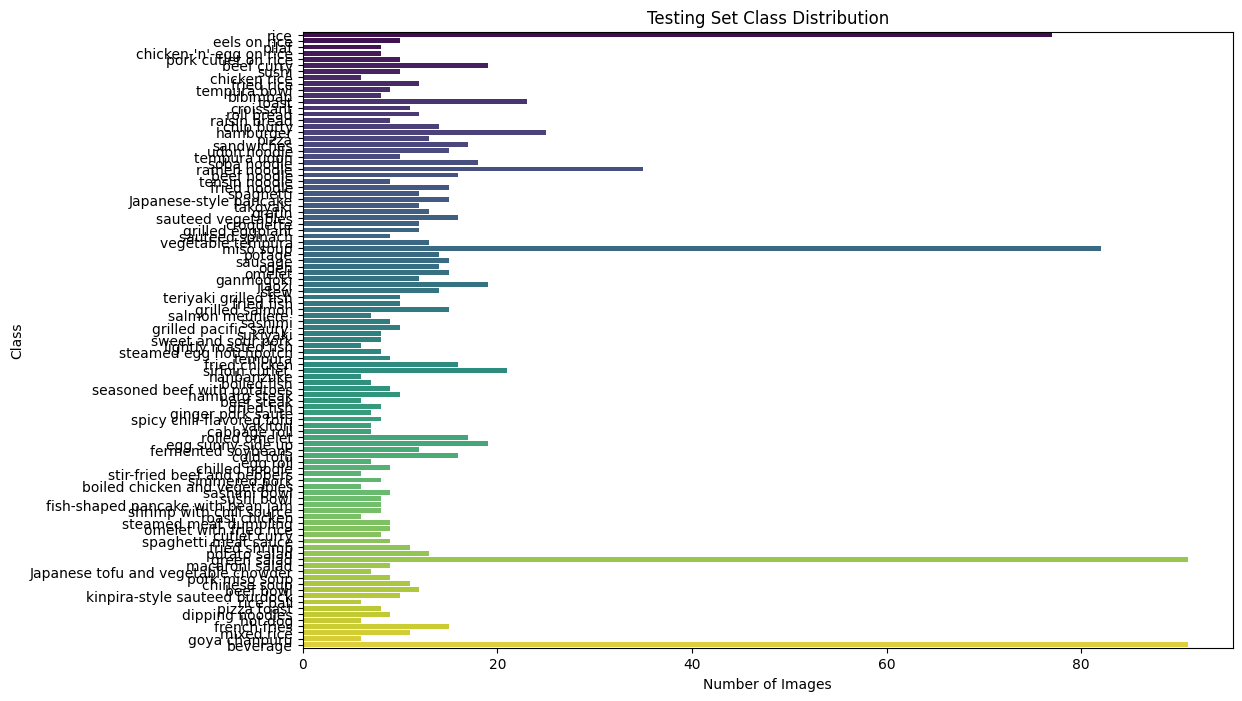

In [62]:
print("Testing Set Class Distribution:")
plot_class_distribution(test_class_distribution, "Testing Set Class Distribution")

 ## Consistency Check

In [71]:
def check_data_consistency(image_ids, dataset_type='train'):
    inconsistent_images = []
    for image_id in image_ids:
        img_path = os.path.join(dataset_path, 'UECFoodPIXCOMPLETE', dataset_type, 'img', f"{image_id}.jpg")
        mask_path = os.path.join(dataset_path, 'UECFoodPIXCOMPLETE', dataset_type, 'mask', f"{image_id}.png")
        if not (os.path.exists(img_path) and os.path.exists(mask_path)):
            inconsistent_images.append(image_id)
    return inconsistent_images

In [72]:
train_inconsistencies = check_data_consistency(train_images['image_id'], dataset_type='train')
test_inconsistencies = check_data_consistency(test_images['image_id'], dataset_type='test')

#### Dataset contains no mask & img inconsistencies

## Summary

In [73]:
print(f"Inconsistent images in training set: {train_inconsistencies}")
print(f"Inconsistent images in testing set: {test_inconsistencies}")

Inconsistent images in training set: []
Inconsistent images in testing set: []


In [70]:
print(f"Number of training images: {len(train_images)}")
print(f"Number of testing images: {len(test_images)}")
print(f"Inconsistent images in training set: {len(train_inconsistencies)}")
print(f"Inconsistent images in testing set: {len(test_inconsistencies)}")
# print("\nTraining Set Class Distribution:")
# print(train_class_distribution)
print("\nTesting Set Class Distribution:")
test_class_distribution

Number of training images: 9000
Number of testing images: 1000
Inconsistent images in training set: 9000
Inconsistent images in testing set: 1000

Testing Set Class Distribution:


{'rice': 77,
 'eels on rice': 10,
 'pilaf': 8,
 "chicken-'n'-egg on rice": 8,
 'pork cutlet on rice': 10,
 'beef curry': 19,
 'sushi': 10,
 'chicken rice': 6,
 'fried rice': 12,
 'tempura bowl': 9,
 'bibimbap': 8,
 'toast': 23,
 'croissant': 11,
 'roll bread': 12,
 'raisin bread': 9,
 'chip butty': 14,
 'hamburger': 25,
 'pizza': 13,
 'sandwiches': 17,
 'udon noodle': 15,
 'tempura udon': 10,
 'soba noodle': 18,
 'ramen noodle': 35,
 'beef noodle': 16,
 'tensin noodle': 9,
 'fried noodle': 15,
 'spaghetti': 12,
 'Japanese-style pancake': 15,
 'takoyaki': 12,
 'gratin': 13,
 'sauteed vegetables': 16,
 'croquette': 12,
 'grilled eggplant': 12,
 'sauteed spinach': 9,
 'vegetable tempura': 13,
 'miso soup': 82,
 'potage': 14,
 'sausage': 15,
 'oden': 14,
 'omelet': 15,
 'ganmodoki': 12,
 'jiaozi': 19,
 'stew': 14,
 'teriyaki grilled fish': 10,
 'fried fish': 10,
 'grilled salmon': 15,
 'salmon meuniere ': 7,
 'sashimi': 9,
 'grilled pacific saury ': 10,
 'sukiyaki': 8,
 'sweet and sour por

## Conclusions
The dataset is very well organized. Label masks are remarkably accurate. Distribution of the categories could've been better though.